In [1]:
# Sampling and point estimates

# You have access to a small trading history of Bitcoin (BTC) and the S&P 500 (SP500). You decide to choose ninety consecutive days to analyze the percent growth of each asset over the same time period.

# You'll start by selecting an initial row number. To ensure that you get a sample of 90 consecutive rows, you'll need to select this starting row number from a range of values from zero to the length of btc_sp_df, excluding the last 90 rows. Your goal is to use this sample to better understand the growth of both assets in general.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, t
from statsmodels.stats.power import TTestIndPower

In [3]:
btc_sp_df = pd.read_csv('btc_sp.csv')
btc_sp_df

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500
0,2017-08-07,3212.780029,3397.679932,3180.889893,3378.939941,2480.91,2477.14,2480.95,2475.88
1,2017-08-08,3370.219971,3484.850098,3345.830078,3419.939941,2474.92,2478.35,2490.87,2470.32
2,2017-08-09,3420.399902,3422.760010,3247.669922,3342.469971,2474.02,2465.35,2474.41,2462.08
3,2017-08-10,3341.840088,3453.449951,3319.469971,3381.280029,2438.21,2465.38,2465.38,2437.75
4,2017-08-11,3373.820068,3679.719971,3372.120117,3650.620117,2441.32,2441.04,2448.09,2437.85
...,...,...,...,...,...,...,...,...,...
1253,2022-07-29,23845.212891,24294.787109,23481.173828,23804.632813,4130.29,4087.33,4140.15,4079.22
1254,2022-08-01,23336.718750,23464.787109,22890.796875,23314.199219,4118.63,4112.38,4144.95,4096.02
1255,2022-08-02,23308.433594,23415.041016,22710.083984,22978.117188,4091.19,4104.21,4140.47,4079.81
1256,2022-08-03,22981.302734,23578.650391,22747.835938,22846.507813,4155.17,4107.96,4167.66,4107.96


In [4]:
# Select a random starting row number, not including the last 90 rows
initial_row_number = np.random.choice(range(btc_sp_df.shape[0] - 90))

initial_row_number

600

In [5]:
# Use initial_row_number to select the next 90 rows from that row number
sample_df = btc_sp_df.iloc[initial_row_number:(initial_row_number + 90)]

sample_df

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500
600,2019-12-24,7354.393066,7535.716797,7269.528809,7322.532227,3223.38,3225.45,3226.43,3220.51
601,2019-12-26,7274.799316,7388.302734,7200.386719,7238.966797,3239.91,3227.20,3240.08,3227.20
602,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,3240.02,3247.23,3247.93,3234.37
603,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,3221.29,3240.09,3240.92,3216.57
604,2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,3230.78,3215.18,3231.72,3212.03
...,...,...,...,...,...,...,...,...,...
685,2020-04-28,7796.970215,7814.527344,7730.806641,7807.058594,2863.39,2909.96,2921.15,2860.71
686,2020-04-29,7806.712402,8871.753906,7786.049316,8801.038086,2939.51,2918.46,2954.86,2912.16
687,2020-04-30,8797.669922,9440.650391,8533.255859,8658.553711,2912.43,2930.91,2930.91,2892.47
688,2020-05-01,8672.782227,9048.023438,8667.763672,8864.766602,2830.71,2869.09,2869.09,2821.61


In [6]:
# Use sample_df to compute the percent increase in Close_SP500
sp500_pct_change = -(sample_df.iloc[0]['Close_SP500'] - sample_df.iloc[-1]['Close_SP500']) / sample_df.iloc[0]['Close_SP500']

# Use sample_df to compute the percent increase in Close_BTC
btc_pct_change = -(sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']

print('SP500: ', sp500_pct_change, '\n', 'BTC: ', btc_pct_change)

SP500:  -0.11808722521080367 
 BTC:  0.217154670093062


In [7]:
# Repeated sampling, point estimates and inference

# In the previous exercise, you used a single sample of ninety days to make your conclusion. However, what if you had a different ninety days. Would your conclusions be different?

# One way to assess this is by taking repeated samples. By repeatedly sampling from your data and computing your point estimate you can see how it changes.

In [8]:
# Write a for loop which repeats the sampling ten times
btc_pct_change_list = []
for i in range(1000):
    # Select a random starting row number
    initial_row_number = np.random.choice(range(btc_sp_df.shape[0] - 90))
    # Select the next 90 rows after the starting row
    sample_df = btc_sp_df.iloc[initial_row_number:initial_row_number + 90]
    # Compute the percent change in closing price of BTC and print it
    btc_pct_change = -(sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']
    btc_pct_change_list.append(btc_pct_change)

btc_pct_change_list[:10]

[-0.3224546027883208,
 0.08939317966622436,
 0.2531763149672567,
 1.6458408770913393,
 0.1609319635312247,
 1.1596252615457108,
 4.2358773595724415,
 -0.16991348516615948,
 -0.40304116105948096,
 -0.4178128500119676]

In [9]:
# Visualizing samples

# You saw that a single sample can give an unreliable point estimate. To investigate this you decide to take 100 samples of 90 consecutive days of BTC trading data. For each of these 100 samples you compute the percent change in BTC over that time period. You then want to plot this data as a histogram to understand the sampling distribution.

# Although these visualizations can be created with plt.hist(), for this exercise, you'll practice using the .plot() argument on a DataFrame, with the arguments bins and density.

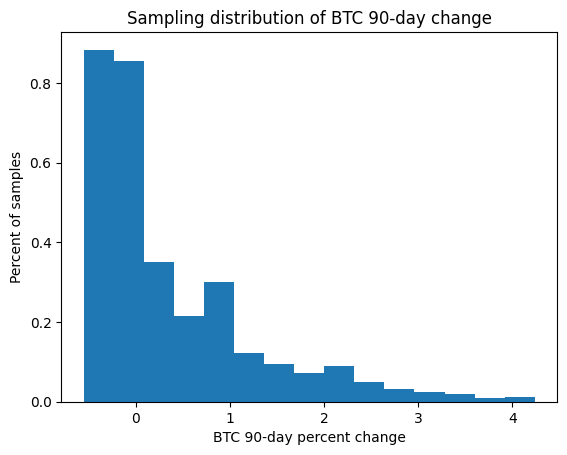

In [10]:
# Plot a histogram of percent changes
plt.hist(btc_pct_change_list, bins=15, density=True)
# Set the x-axis label
plt.xlabel('BTC 90-day percent change')
# Set the y-axis label
plt.ylabel('Percent of samples')
# Set the title
plt.title('Sampling distribution of BTC 90-day change')

plt.show()

In [11]:
# Normal sampling distributions

# You'd like to estimate a realistic mean closing price for the S&P 500 over a subset of its trading history. This seems like a natural application of a confidence interval, since you have a sample statistic and want to use it to estimate a population statistic. However, your first step should be to check if the sampling distribution is approximately normal. In this exercise, you'll do exactly that. In the next exercise, you'll use this result to create your confidence interval.

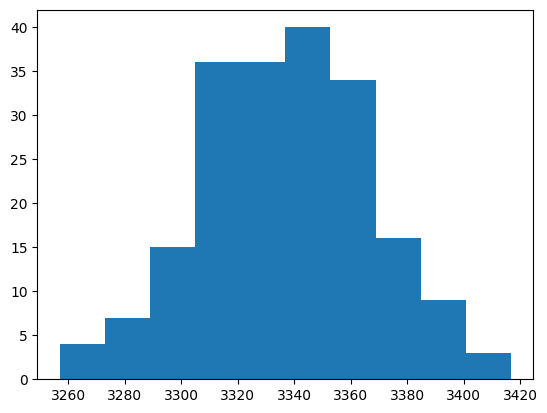

In [12]:
# Define the number of samples to take and store the sample means
num_samples = 200
sample_means = []

# Write a for loop which repeats the sampling num_samples times
for i in range(num_samples):
  # Select 500 random Close_SP500 prices 
  sp500_sample = np.random.choice(btc_sp_df['Close_SP500'], size=500)
  # Compute mean closing price and save it to sample_means
  sample_means.append(sp500_sample.mean())
    
plt.hist(sample_means)
plt.show()

In [13]:
# Notice how the sampling distribution is approximately normal, indicating that a confidence interval is a valid choice for estimating the closing price of the SP500.

# Calculating confidence intervals

# Now that you've demonstrated that the sampling distribution for the closing price of the S&P 500 is approximately normally distributed, you'll compute a confidence interval! You want to estimate the mean closing price of the S&P 500, and calculating a confidence interval will do just that for you.

In [14]:
# Select a sample of 500 random days
sample_closing = np.random.choice(btc_sp_df['Close_SP500'], size=500)

sample_closing[:10]

array([3097.74, 4164.66, 2561.26, 3316.81, 3795.54, 2457.59, 2943.03,
       4164.66, 4183.96, 2663.68])

In [15]:
# Calculate the mean of the sample
sample_mean = sample_closing.mean()

sample_mean

3330.5848400000004

In [16]:
sample_std = sample_closing.std()

sample_std

676.585579539628

In [17]:
# Calculate the standard error of the sample
sample_se = sample_std / np.sqrt(len(sample_closing))

sample_se

30.257826968933983

In [18]:
# Calculate a 95% confidence interval using this data
stats.norm.interval(alpha=0.95,
                   loc=sample_mean,
                   scale=sample_se)

C:\Users\Alienware\AppData\Local\Temp\ipykernel_31480\4064907285.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.norm.interval(alpha=0.95,


(3271.280588890445, 3389.889091109556)

In [19]:
# Drawing conclusions from samples

# You've seen how random sampling can be used to choose a sample of data which is (hopefully!) representative of the population you are studying. You've also seen how bias in sampling procedure can result in conclusions that are suspect at best, and completely wrong at worst.

# In this exercise you'll analyze the average closing price of the S&P 500. If you take two different samples of trading days and compute confidence intervals for each, should you expect to see the same result? It's time for you to dive in and see!

In [20]:
# Sample 1: Select a random sample of 500 rows
sample_df = btc_sp_df.sample(n=500)

sample_ci = stats.norm.interval(alpha=0.95, 
	loc=sample_df['Close_SP500'].mean(), 
	scale=sample_df['Close_SP500'].std()/np.sqrt(500))

sample_ci

C:\Users\Alienware\AppData\Local\Temp\ipykernel_31480\1568023180.py:4: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  sample_ci = stats.norm.interval(alpha=0.95,


(3296.8513620665376, 3419.932997933462)

In [21]:
# Sample 2: Select the first 500 rows
first_500_df = btc_sp_df.iloc[:500]

# Compute a 95% confidence interval for the closing price of SP500
first_500_ci = stats.norm.interval(alpha=0.95, 
	loc=first_500_df['Close_SP500'].mean(), 
	scale=first_500_df['Close_SP500'].std()/np.sqrt(500))

first_500_ci

C:\Users\Alienware\AppData\Local\Temp\ipykernel_31480\2745980736.py:5: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  first_500_ci = stats.norm.interval(alpha=0.95,


(2719.898053221996, 2744.858786778004)

In [22]:
# Testing for normality

# A powerful suite of statistical tools, which includes several common hypothesis tests, depends on the assumption that the underlying data is normally distributed. While a histogram can hint at whether the data is approximately normally distributed, various hypothesis tests allow us to test this assumption directly. Moreover, histograms can be very sensitive to the number of bins, especially when the sample sizes are small.

In [23]:
data = {
    'Title': ['Fire Specialist']*35,
    'Gender': ['F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'],
    'Ethnicity': ['Hispanic or Latino']*35,
    'Annual Salary': [79799.98, 79799.98, 83785.26, 79799.98, 96991.96, 87979.84, 87979.84, 83785.16, 87979.84, 83785.26, 87979.84, 72383.48, 96991.96, 83785.26, 75999.56, 79799.98, 79799.98, 87979.84, 83785.26, 75999.56, 87979.84, 83785.26, 92372.80, 79799.98, 83785.26, 87979.84, 87979.84, 87979.84, 96991.96, 87979.84, 87979.84, 87979.84, 87979.79, 96991.96, 75999.04],
    'Years of Employment': [11, 11, 15, 12, 24, 17, 17, 15, 18, 15, 18, 6, 24, 15, 7, 11, 13, 17, 15, 7, 17, 15, 22, 13, 15, 18, 18, 17, 27, 18, 17, 17, 18, 25, 7]
}

salary_df = pd.DataFrame(data)
salary_df

,Title,Gender,Ethnicity,Annual Salary,Years of Employment
0,Fire Specialist,F,Hispanic or Latino,79799.98,11
1,Fire Specialist,M,Hispanic or Latino,79799.98,11
2,Fire Specialist,M,Hispanic or Latino,83785.26,15
3,Fire Specialist,M,Hispanic or Latino,79799.98,12
4,Fire Specialist,M,Hispanic or Latino,96991.96,24
5,Fire Specialist,M,Hispanic or Latino,87979.84,17
6,Fire Specialist,M,Hispanic or Latino,87979.84,17
7,Fire Specialist,M,Hispanic or Latino,83785.16,15
8,Fire Specialist,M,Hispanic or Latino,87979.84,18
9,Fire Specialist,M,Hispanic or Latino,83785.26,15


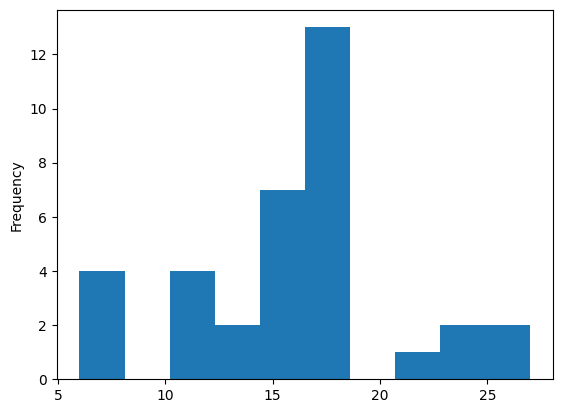

In [24]:
# Plot a histogram of the employees' "Years of Employment"
salary_df['Years of Employment'].plot(kind="hist")
plt.show()

In [25]:
# Conduct an Anderson-Darling test using the years of employment from salary_df
result = stats.anderson(salary_df['Years of Employment'])
result

AndersonResult(statistic=0.8551630390545597, critical_values=array([0.527, 0.6  , 0.719, 0.839, 0.998]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=15.771428571428572, scale=5.012253891776658)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [26]:
# Print which critical values the test statistic is greater than the critical values
print(result.statistic > result.critical_values) # the null hypothesis is that the data is normally distributed

[ True  True  True  True False]


In [27]:
# Print the significance levels at which the null hypothesis is rejected
print(result.significance_level[result.statistic > result.critical_values]) # normal distribution assumed for all statistical significance levels, except at 1%

[15.  10.   5.   2.5]


In [28]:
# At the 1% significance level: If you’re willing to accept a maximum of 1% chance of being wrong when you say that the data is not normally distributed, then you would not reject the null hypothesis (that the data is normally distributed) in this case. This is because your test statistic is less than the critical value at the 1% level (there's at least a 1% chance that your data could be normally distributed ?)

# At the 2.5% significance level: If you’re willing to accept a 2.5% chance of being wrong, then you would reject the null hypothesis and conclude that the data is not normally distributed. This is because your test statistic is greater than the critical value at the 2.5% level.

In [29]:
# Distribution of errors

# Almost no real-world process can be predicted perfectly. A desirable outcome is that the error is normally distributed. This means that some actual values will be above your prediction, and some will fall below it. That is, the errors (i.e. the difference between the actual values and predictions) will seem to "float" randomly around zero.

# In this exercise, you will analyze results from a pre-built linear model which predicts a police officer's salary. You will then look at the error and see if it is approximately normally distributed. The predictions are a list of values stored in preds, and the actual salaries are a list of values stored in salaries.

In [30]:
salaries = [72681.44,83210.4,83210.4,72681.44,95270.24,72681.44,77767.04,72681.44,58680.96,77767.04,72681.44,83210.4,77767.04,72681.44,72681.44,72681.44,72681.44,72681.44,72681.44,83210.4,72681.44,72681.44,72681.44,65850.72,72681.44,77767.04,72681.44,72681.44,65850.72,58680.96,58680.96,72681.44,77767.04,58680.96,58680.96,77767.04,72681.44,83210.4,95270.24,77767.04,95270.24,72681.44,83210.4,72681.44,72681.44,77767.04,77767.04,77767.04,72681.44,95270.24,72681.44,58680.96,77767.04,72681.44,58680.96,83210.4,83210.4,89034.4,83210.4,72681.44,58680.96,72681.44,83210.4,72681.44,77767.04,83210.4,65850.72,77767.04,58680.96,72681.44,58680.96,95270.24,95270.24,72681.44,83210.4,72681.44,95270.24,58680.96,72681.44,83210.4,72681.44,72681.44,95270.24,72681.44,58680.96,89034.4,95270.24,65850.72,72681.44,58680.96,83210.4,77767.04,72681.44,65850.72,77767.04,83210.4,58680.96,83210.4,77767.04,72681.44,72681.44,83210.4,72681.44,72681.44,95270.24,95270.24,58680.96,83210.4,58680.96,83210.4,58680.96,58680.96,83210.4,72681.44,77767.04,77767.04,58680.96,65850.72,77767.04,72681.44,58680.96,77767.04,72681.44,95270.24,72681.44,72681.44,58680.96,95270.24,72681.44,58680.96,72681.44,89034.4,83210.4,95270.24,65850.72,72681.44,58680.96,72681.44,77767.04,95270.24,77767.04,58680.96,77767.04,83210.4,58680.96,83210.4,58680.96,72681.44,83210.4,89034.4,58680.96,72681.44,72681.44,58680.96,83210.4,83210.4,72681.44,58680.96,77767.04,72681.44,58680.96,89034.4,58680.96,83210.4,83210.4,58680.96,83210.4,65850.72,58680.96,77767.04,72681.44,65850.72,72681.44,72681.44,58680.96,77767.04,83210.4,77767.04,72681.44,83210.4,89034.4,72681.44,77767.04,95270.24,89034.4,72681.44,65850.72,89034.4,77767.04,58680.96,83210.4,83210.4,83210.4,83210.4,89034.4,83210.4,72681.44,65850.72,95270.24,65850.72,77767.04,95270.24,83210.4,72681.44,72681.44,65850.72,58680.96,65850.72,72681.44,72681.44,72681.44,83210.4,58680.96,58680.96,70549.44,83210.4,77767.04,65850.72,83210.4,58680.96,58680.96,58680.96,83210.4,72681.44,65850.72,58680.96,83210.4,72681.44,95270.24,72681.44,77767.04,95270.24,83210.4,83210.4,72681.44,77767.04,58680.96,72681.44,72681.44,77767.04,89034.4,72681.44,77767.04,72681.44,77767.04,83210.4,65850.72,77767.04,77767.04,83210.4,83210.4,83210.4,77767.04,95270.24,89034.4,65850.72,89034.4,58680.96,95270.24,58680.96,77767.04,83210.4,58680.96,72681.44,58680.96,95270.24,77767.04,77767.04,77767.04,72681.44,72681.44,72681.44,95270.24,95270.24,58680.96,77767.04,58680.96,95270.24,83210.4,95270.24,89034.4,65850.72,58680.96,83210.4,65850.72,83210.4,89034.4,72681.44,77767.04,72681.44,77767.04,77767.04,89034.4,72681.44,95270.24,72681.44,77767.04,95270.24,72681.44,58680.96,83210.4,77767.04,72681.44,77767.04,65850.72,58680.96,72681.44,77767.04,72681.44,65850.72,72681.44,72681.44,72681.44,72681.44,83210.4,77767.04,72681.44,77767.04,77767.04,83210.4,83210.4,83210.4,83210.4,83210.4,77767.04,65850.72,72681.44,58680.96,95270.24,95270.24,72681.44,77767.04,72681.44,72681.44,58680.96,83210.4,72681.44,77767.04,83210.4,72681.44,72681.44,77767.04,95270.24,95270.24,95270.24,58680.96,72681.44,58680.96,72681.44,58680.96,72681.44,95270.24,65850.72,77767.04,65850.72,72681.44,83210.4,95270.24,95270.24,83210.4,65850.72,58680.96,65850.72,83210.4,65850.72,65850.72,72681.44,95270.24,83210.4,77767.04,65850.72,95270.24,72681.44,95270.24,72681.44,95270.24,58680.96,72681.44,83210.4,95270.24,58680.96,77767.04,72681.44,77767.04,72681.44,95270.24,95270.24,72681.44,72681.44,83210.4,83210.4,95270.24,77767.04,95270.24,58680.96,83210.4,72681.44,77767.04,83210.4,89034.4,72681.44,83210.4,65850.72,95270.24,83210.4,77767.04,77767.04,72681.44,72681.44,77767.04,58680.96,77767.04,77767.04,58680.96,89034.4,77767.04,72681.44,83210.4,72681.44,58680.96,72681.44,65850.72,83210.4,58680.96,83210.4,95270.24,72681.44,95270.24,77767.04,58680.96,72681.44,95270.24,95270.24,72681.44,95270.24,77767.04,58680.96,65850.72,58680.96,72681.44,89034.4,95270.24,83210.4,72681.44,72681.44,77767.04,65850.72,72681.44,72681.44,72681.44,89034.4,77767.04,77767.04,83210.4,77767.04,72681.44,77767.04,72681.44,83210.4,83210.4,58680.96,95270.24,89034.4,95270.24,58680.96,72681.44,89034.4,89034.4,77767.04,77767.04,95270.24,72681.44,72681.44,72681.44,72681.44,77767.04,72681.44,77767.04,83210.4,72681.44,72681.44,65850.72,83210.4,77767.04,72681.44,58680.96,72681.44,72681.44,72681.44,83210.4,95270.24,77767.04,77767.04,58680.96,83210.4,65850.72,72681.44,72681.44,72681.44,83210.4,72681.44,77767.04,72681.44,77767.04,72681.44,65850.72,65850.72,72681.44,83210.4,65850.72,65850.72,83210.4,83210.4,95270.24,72681.44,89034.4,72681.44,89034.4,72681.44,72681.44,72681.44,95270.24,72681.44,83210.4,58680.96,77767.04,77767.04,72681.44,58680.96,72681.44,65850.72,89034.4,58680.96,72681.44,72681.44,65850.72,77767.04,72681.44,72681.44,95270.24,65850.72,72681.44,58680.96,77767.04,72681.44,72681.44,72681.44,77767.04,77767.04,95270.24,72681.44,77767.04,72681.44,83210.4,77767.04,83210.4,83210.4,72681.44,83210.4,83210.4,72681.44,77767.04,89034.4,77767.04,65850.72,58680.96,65850.72,72681.44,77767.04,89034.4,95270.24,72681.44,72681.44,77767.04,77767.04,83210.4,72681.44,83210.4,77767.04,89034.4,77767.04,72681.44,72681.44,72681.44,77767.04,95270.24,58680.96,72681.44,95270.24,83210.4,58680.96,83210.4,77767.04,77767.04,72681.44,58680.96,72681.44,72681.44,72681.44,83210.4,77767.04,72681.44,95270.24,95270.24,83210.4,72681.44,65850.72,72681.44,77767.04,89034.4,83210.4,95270.24,72681.44,77767.04,83210.4,95270.24,58680.96,72681.44,77767.04,77767.04,72681.44,72681.44,83210.4,89034.4,72681.44,77767.04,95270.24,72681.44,77767.04,95270.24,72681.44,89034.4,83210.4,77767.04,95270.24,95270.24,58680.96,77767.04,89034.4,72681.44,77767.04,72681.44,65850.72,77767.04,77767.04,77767.04,83210.4,58680.96,95270.24,89034.4,72681.44,95270.24,89034.4,58680.96,72681.44,83210.4,77767.04,83210.4,72681.44,58680.96,95270.24,72681.44,72681.44,72681.44,58680.96,83210.4,77767.04,83210.4,83210.4,83210.4,95270.24,83210.4,72681.44,72681.44,58680.96,72681.44,58680.96,72681.44,65850.72,83210.4,83210.4,72681.44,77767.04,65850.72,89034.4,72681.44,65850.72,77767.04,77767.04,77767.04,72681.44,65850.72,58680.96,58680.96,77767.04,58680.96,95270.24,95270.24,72681.44,58680.96,72681.44,77767.04,58680.96,58680.96,89034.4,77767.04,72681.44,72681.44,77767.04,65850.72,89034.4,72681.44,65850.72,89034.4,89034.4,58680.96,72681.44,72681.44,72681.44,77767.04,95270.24,72681.44,58680.96,83210.4,77767.04,77767.04,77767.04,77767.04,95270.24,95270.24,83210.4,89034.4,58680.96,72681.44,95270.24,95270.24,77767.04,77767.04,83210.4,58680.96,58680.96,95270.24,95270.24,58680.96,77767.04,72681.44,95270.24,65850.72,72681.44,72681.44,95270.24,72681.44,72681.44,72681.44,95270.24,72681.44,72681.44,72681.44,95270.24,72681.44,58680.96,77767.04,58680.96,72681.44,89034.4,83210.4,77767.04,72681.44,83210.4,72681.44,95270.24,72681.44,58680.96,72681.44,83210.4,72681.44,58680.96,72681.44,77767.04,72681.44,65850.72,95270.24,77767.04,72681.44,95270.24,89034.4,72681.44,95270.24,95270.24,95270.24,72681.44,72681.44,83210.4,58680.96,65850.72,72681.44,83210.4,89034.4,72681.44,65850.72,72681.44,72681.44,77767.04,77767.04,65850.72,58680.96,83210.4,95270.24,83210.4,83210.4,72681.44,58680.96,72681.44,83210.4,77767.04,72681.44,95270.24,72681.44,65850.72,77767.04,65850.72,58680.96,83210.4,83210.4,77767.04,58680.96,58680.96,72681.44,77767.04,83210.4,77767.04,83210.4,83210.4,83210.4,77767.04,58680.96,72681.44,83210.4,72681.44,72681.44,83210.4,77767.04,58680.96,77767.04,72681.44,95270.24,58680.96,77767.04,83210.4,77767.04,95270.24,72681.44,83210.4,77767.04,65850.72,83210.4,77767.04,83210.4,77767.04,77767.04,77767.04,65850.72,72681.44,72681.44,72681.44,83210.4,77767.04,72681.44,72681.44,77767.04,83210.4,72681.44,83210.4,58680.96,77767.04,83210.4,77767.04,83210.4,77767.04,77767.04,83210.4,58680.96,83210.4,72681.44,72681.44,65850.72,65850.72,72681.44,77767.04,72681.44,72681.44,77767.04,65850.72,72681.44,77767.04,95270.24,72681.44,89034.4,72681.44,77767.04,77767.04,83210.4,83210.4,72681.44,83210.4,95270.24,83210.4,83210.4,58680.96,72681.44,72681.44,83210.4,72681.44,72681.44,83210.4,72681.44,77767.04,77767.04,72681.44,95270.24,89034.4,72681.44,58680.96,72681.44,77767.04,72681.44,95270.24,58680.96,95270.24,83210.4,65850.72,83210.4,89034.4,72681.44,65850.72,77767.04,72681.44,77767.04,72681.44,72681.44,58680.96,72681.44,65850.72,58680.96,83210.4,77767.04,72681.44,83210.4,83210.4,89034.4,83210.4,72681.44,77767.04,83210.4,58680.96,72681.44,58680.96,83210.4,77767.04,83210.4,65850.72,72681.44,77767.04,83210.4,65850.72,77767.04,89034.4,83210.4,58680.96,95270.24,65850.72,58680.96,58680.96,95270.24,58680.96,83210.4,65850.72,72681.44,77767.04,65850.72,77767.04,77767.04,58680.96,83210.4,95270.24,72681.44,72681.44,77767.04,72681.44,83210.4,89034.4,72681.44,83210.4,83210.4,77767.04,72681.44,72681.44,95270.24,83210.4,72681.44,95270.24,65850.72,72681.44,72681.44,72681.44,95270.24,58680.96,77767.04,72681.44,72681.44,72681.44,83210.4,89034.4,95270.24,95270.24,72681.44,77767.04,77767.04,72681.44,72681.44,77767.04,77767.04,72681.44,58680.96,89034.4,77767.04,83210.4,72681.44,58680.96,58680.96,58680.96,58680.96,72681.44,72681.44,83210.4,77767.04,95270.24,95270.24,58680.96,58680.96,72681.44,83210.4,83210.4,58680.96,72681.44,58680.96,89034.4,77767.04,58680.96,72681.44,72681.44,72681.44,65850.72,95270.24,77767.04,72681.44,72681.44,65850.72,72681.44,72681.44,65850.72,83210.4,72681.44,65850.72,83210.4,65850.72,65850.72,72681.44,83210.4,72681.44,77767.04,72681.44,72681.44,83210.4,77767.04,77767.04,58680.96,72681.44,95270.24,83210.4,65850.72,58680.96,72681.44,83210.4,77767.04,72681.44,65850.72,77767.04,72681.44,95270.24,77767.04,77767.04,72681.44,83210.4,95270.24,72681.44,83210.4,72681.44,58680.96,89034.4,95270.24,83210.4,95270.24,77767.04,65850.72,89034.4,83210.4,83210.4,72681.44,72681.44,72681.44,72681.44,65850.72,72681.44,65850.72,95270.24,77767.04,72681.44,72681.44,72681.44,77767.04,58680.96,72681.44,72681.44,72681.44,58680.96,83210.4,83210.4,83210.4,83210.4,83210.4,77767.04,77767.04,72681.44,95270.24,77767.04,83210.4,89034.4,72681.44,83210.4,65850.72,77767.04,72681.44,72681.44,72681.44,65850.72,83210.4,83210.4,83210.4,83210.4,72681.44,77767.04,72681.44,65850.72,77767.04,72681.44,77767.04,65850.72,89034.4,72681.44,95270.24,58680.96,95270.24,77767.04,95270.24,72681.44,77767.04,83210.4,58680.96,72681.44,72681.44]

In [31]:
preds = [71169.42568010492,84943.04860226545,81882.243508452,69639.02313319819,92260.86319720939,69304.8249936085,74230.23077391837,72699.82822701165,65047.81549247802,78487.24027504885,66244.01989979505,81595.53335977567,83078.44791576904,68108.62058629146,69304.8249936085,69352.31298452186,69686.51112411155,69639.02313319819,72699.82822701165,84943.04860226545,68156.10857720482,66244.01989979505,72365.63008742196,66076.9208300002,71169.42568010492,78821.43841463854,72699.82822701165,72365.63008742196,66244.01989979505,65047.81549247802,64713.61735288833,72365.63008742196,78487.24027504885,65047.81549247802,65047.81549247802,75760.6333208251,66625.70603029811,81595.53335977567,89200.05810339593,74230.23077391837,93958.36481391096,69304.8249936085,81595.53335977567,72580.21714813016,70835.22754051523,77291.03586773181,78821.43841463854,78487.24027504885,72699.82822701165,92427.96226700423,74230.23077391837,64713.61735288833,74230.23077391837,72365.63008742196,64761.10534380169,84608.85046267576,81548.04536886231,88003.85369607889,83412.64605535872,71002.32661031008,65047.81549247802,69304.8249936085,80399.32895245863,71169.42568010492,74230.23077391837,84608.85046267576,66578.21803938475,78821.43841463854,65095.30348339138,70668.12847072039,65095.30348339138,92595.06133679907,101777.47661823942,69639.02313319819,83078.44791576904,72699.82822701165,89200.05810339593,65047.81549247802,71002.32661031008,80351.84096154527,69686.51112411155,69639.02313319819,81882.243508452,72699.82822701165,65047.81549247802,86473.45114917218,92595.06133679907,66578.21803938475,69639.02313319819,65047.81549247802,80184.74189175043,78821.43841463854,68108.62058629146,66578.21803938475,74230.23077391837,84943.04860226545,65047.81549247802,84943.04860226545,78821.43841463854,68108.62058629146,72532.7291572168,81882.243508452,71169.42568010492,74230.23077391837,89581.74423389898,98382.47338483628,64761.10534380169,81882.243508452,65047.81549247802,80351.84096154527,65047.81549247802,65047.81549247802,81595.53335977567,69471.92406340335,74230.23077391837,78821.43841463854,65047.81549247802,66578.21803938475,77291.03586773181,71169.42568010492,65047.81549247802,74277.71876483173,72699.82822701165,92308.35118812275,72699.82822701165,72699.82822701165,65095.30348339138,94125.4638837058,69471.92406340335,64713.61735288833,69639.02313319819,88003.85369607889,81882.243508452,89534.25624298562,66578.21803938475,69639.02313319819,65047.81549247802,71169.42568010492,78654.3393448437,95655.86643061251,75760.6333208251,65047.81549247802,74230.23077391837,80351.84096154527,65047.81549247802,81882.243508452,65047.81549247802,72699.82822701165,81715.14443865715,87669.6555564892,64713.61735288833,72365.63008742196,72699.82822701165,64713.61735288833,81595.53335977567,81882.243508452,74063.13170412353,64713.61735288833,78487.24027504885,70835.22754051523,65095.30348339138,87836.75462628405,64713.61735288833,80017.64282195558,81548.04536886231,64880.716422683174,80017.64282195558,65095.30348339138,65047.81549247802,76956.83772814213,72365.63008742196,66411.1189695899,66578.21803938475,72699.82822701165,65047.81549247802,80017.64282195558,81548.04536886231,74230.23077391837,72699.82822701165,81882.243508452,86306.35207937734,68108.62058629146,73943.52062524205,103307.87916514615,89534.25624298562,69304.8249936085,65047.81549247802,86139.25300958248,73896.03263432869,64713.61735288833,81548.04536886231,81548.04536886231,80017.64282195558,81882.243508452,86139.25300958248,84990.53659317881,66578.21803938475,64713.61735288833,101777.47661823942,66578.21803938475,77291.03586773181,89534.25624298562,80351.84096154527,66244.01989979505,69639.02313319819,66578.21803938475,65047.81549247802,66076.9208300002,69639.02313319819,72699.82822701165,72699.82822701165,81380.94629906747,64546.51828309349,65047.81549247802,74063.13170412353,81882.243508452,78821.43841463854,66578.21803938475,80351.84096154527,65047.81549247802,65047.81549247802,65047.81549247802,81882.243508452,71169.42568010492,66578.21803938475,65047.81549247802,81715.14443865715,71002.32661031008,95488.76736081767,72699.82822701165,75760.6333208251,95321.66829102283,81595.53335977567,80351.84096154527,69639.02313319819,74277.71876483173,65047.81549247802,72699.82822701165,72699.82822701165,78821.43841463854,88003.85369607889,72365.63008742196,77291.03586773181,68108.62058629146,77291.03586773181,81882.243508452,66578.21803938475,78821.43841463854,83078.44791576904,81595.53335977567,81548.04536886231,81882.243508452,74230.23077391837,94125.4638837058,88003.85369607889,66076.9208300002,88051.34168699225,65047.81549247802,106368.6842589596,65047.81549247802,77291.03586773181,83078.44791576904,64713.61735288833,73896.03263432869,65047.81549247802,92427.96226700423,74063.13170412353,77291.03586773181,75808.12131173846,72747.316217925,71002.32661031008,72699.82822701165,117081.50208730667,103140.7800953513,65047.81549247802,80351.84096154527,65047.81549247802,103307.87916514615,81762.63242957051,89534.25624298562,86473.45114917218,66578.21803938475,65047.81549247802,81882.243508452,66578.21803938475,81882.243508452,87669.6555564892,74277.71876483173,78487.24027504885,72365.63008742196,78821.43841463854,78821.43841463854,88003.85369607889,69352.31298452186,99912.87593174301,73896.03263432869,78487.24027504885,99912.87593174301,71169.42568010492,65047.81549247802,84943.04860226545,74230.23077391837,72699.82822701165,74277.71876483173,66578.21803938475,65047.81549247802,69639.02313319819,81882.243508452,68108.62058629146,65047.81549247802,69639.02313319819,70835.22754051523,71169.42568010492,74230.23077391837,80351.84096154527,74230.23077391837,66578.21803938475,77291.03586773181,78868.9264055519,80351.84096154527,81715.14443865715,81882.243508452,83412.64605535872,80351.84096154527,78868.9264055519,66578.21803938475,72699.82822701165,65047.81549247802,94125.4638837058,92595.06133679907,74230.23077391837,75760.6333208251,74230.23077391837,71169.42568010492,64713.61735288833,80017.64282195558,66244.01989979505,78487.24027504885,80017.64282195558,70835.22754051523,74230.23077391837,83412.64605535872,95655.86643061251,100247.0740713327,98716.67152442597,65047.81549247802,72699.82822701165,65047.81549247802,68108.62058629146,65095.30348339138,71169.42568010492,81882.243508452,66578.21803938475,76956.83772814213,66578.21803938475,71169.42568010492,80351.84096154527,95655.86643061251,89534.25624298562,84608.85046267576,66578.21803938475,64546.51828309349,66578.21803938475,80351.84096154527,66625.70603029811,66578.21803938475,71169.42568010492,92475.45025791759,81762.63242957051,74230.23077391837,66578.21803938475,89534.25624298562,72699.82822701165,89367.15717319078,71169.42568010492,113686.49885390353,65095.30348339138,67941.52151649662,83412.64605535872,92595.06133679907,64713.61735288833,78821.43841463854,67774.42244670178,74230.23077391837,69304.8249936085,92595.06133679907,94125.4638837058,72699.82822701165,69304.8249936085,95321.66829102283,89200.05810339593,90730.46065030266,84608.85046267576,89200.05810339593,64713.61735288833,81548.04536886231,69639.02313319819,78320.14120525401,83078.44791576904,88003.85369607889,72699.82822701165,83412.64605535872,66578.21803938475,89534.25624298562,83412.64605535872,73896.03263432869,74230.23077391837,72747.316217925,72699.82822701165,78487.24027504885,65047.81549247802,77291.03586773181,84608.85046267576,64761.10534380169,86139.25300958248,87669.6555564892,72365.63008742196,81548.04536886231,70835.22754051523,64713.61735288833,73896.03263432869,66244.01989979505,81548.04536886231,65095.30348339138,81715.14443865715,92595.06133679907,68108.62058629146,89367.15717319078,78654.3393448437,65047.81549247802,69639.02313319819,89367.15717319078,94125.4638837058,69639.02313319819,95655.86643061251,77123.93679793697,65047.81549247802,66578.21803938475,64713.61735288833,70835.22754051523,88003.85369607889,103307.87916514615,80017.64282195558,68108.62058629146,67774.42244670178,78487.24027504885,66076.9208300002,68108.62058629146,68108.62058629146,69639.02313319819,86473.45114917218,78821.43841463854,74230.23077391837,84943.04860226545,78868.9264055519,72699.82822701165,77291.03586773181,72699.82822701165,81882.243508452,89247.54609430929,65095.30348339138,98716.67152442597,86473.45114917218,97186.26897751924,65047.81549247802,71169.42568010492,86473.45114917218,88003.85369607889,77291.03586773181,78654.3393448437,101276.17940885489,69639.02313319819,68108.62058629146,72198.53101762712,66578.21803938475,74230.23077391837,68108.62058629146,74230.23077391837,80351.84096154527,71216.91367101828,69639.02313319819,66578.21803938475,81548.04536886231,76956.83772814213,67774.42244670178,65095.30348339138,66578.21803938475,74063.13170412353,71169.42568010492,80184.74189175043,95655.86643061251,78487.24027504885,78821.43841463854,65047.81549247802,81882.243508452,66578.21803938475,72699.82822701165,72699.82822701165,70835.22754051523,81882.243508452,71169.42568010492,77291.03586773181,68108.62058629146,78868.9264055519,69639.02313319819,66578.21803938475,66578.21803938475,68108.62058629146,80351.84096154527,66578.21803938475,66411.1189695899,84943.04860226545,84943.04860226545,104838.28171205288,72699.82822701165,88003.85369607889,71169.42568010492,100247.0740713327,74230.23077391837,72747.316217925,72699.82822701165,89534.25624298562,74230.23077391837,81715.14443865715,64713.61735288833,74230.23077391837,77004.32571905549,69639.02313319819,65047.81549247802,71002.32661031008,66625.70603029811,86520.93914008554,65047.81549247802,69137.72592381366,72699.82822701165,66578.21803938475,75760.6333208251,73896.03263432869,70882.71553142859,91064.65878989235,65047.81549247802,74230.23077391837,65047.81549247802,78821.43841463854,72532.7291572168,72532.7291572168,69137.72592381366,92427.96226700423,77291.03586773181,101610.37754844458,72699.82822701165,75760.6333208251,69639.02313319819,80351.84096154527,77291.03586773181,94125.4638837058,81882.243508452,66578.21803938475,80351.84096154527,80351.84096154527,72699.82822701165,78821.43841463854,88003.85369607889,76956.83772814213,66578.21803938475,65047.81549247802,64713.61735288833,71169.42568010492,81929.73149936536,88003.85369607889,92595.06133679907,72699.82822701165,72699.82822701165,74230.23077391837,78487.24027504885,81715.14443865715,72699.82822701165,81715.14443865715,76789.73865834728,88003.85369607889,77291.03586773181,74230.23077391837,69639.02313319819,69639.02313319819,74230.23077391837,94125.4638837058,65047.81549247802,68108.62058629146,97186.26897751924,81882.243508452,65047.81549247802,81715.14443865715,74230.23077391837,77291.03586773181,69639.02313319819,65047.81549247802,69639.02313319819,72699.82822701165,72699.82822701165,84943.04860226545,89534.25624298562,68108.62058629146,103307.87916514615,89367.15717319078,80351.84096154527,69639.02313319819,66578.21803938475,72699.82822701165,77291.03586773181,86473.45114917218,81882.243508452,90730.46065030266,69352.31298452186,77291.03586773181,84990.53659317881,80399.32895245863,65047.81549247802,71169.42568010492,77291.03586773181,74230.23077391837,71169.42568010492,71216.91367101828,84943.04860226545,88003.85369607889,72699.82822701165,77291.03586773181,92642.54932771243,68108.62058629146,78534.72826596221,94125.4638837058,69639.02313319819,88003.85369607889,80017.64282195558,75426.4351812354,98429.96137574964,90730.46065030266,65047.81549247802,76956.83772814213,88003.85369607889,69639.02313319819,87669.6555564892,72365.63008742196,64546.51828309349,77291.03586773181,77291.03586773181,86353.8400702907,84943.04860226545,65047.81549247802,93791.2657441161,86473.45114917218,69471.92406340335,89200.05810339593,86306.35207937734,65047.81549247802,70668.12847072039,84608.85046267576,74230.23077391837,81882.243508452,69639.02313319819,65047.81549247802,98716.67152442597,69304.8249936085,69304.8249936085,70882.71553142859,64713.61735288833,83078.44791576904,73896.03263432869,80017.64282195558,81548.04536886231,83078.44791576904,92260.86319720939,83245.54698556388,72699.82822701165,69639.02313319819,65095.30348339138,72699.82822701165,65047.81549247802,72699.82822701165,66578.21803938475,84775.94953247061,84943.04860226545,72699.82822701165,77338.52385864517,66578.21803938475,88003.85369607889,71216.91367101828,66578.21803938475,77291.03586773181,77291.03586773181,92427.96226700423,71169.42568010492,66578.21803938475,65047.81549247802,65047.81549247802,78534.72826596221,65047.81549247802,95655.86643061251,94125.4638837058,68108.62058629146,65047.81549247802,70668.12847072039,74230.23077391837,65047.81549247802,65047.81549247802,86473.45114917218,78821.43841463854,69639.02313319819,72699.82822701165,78821.43841463854,64761.10534380169,87669.6555564892,67774.42244670178,66244.01989979505,87669.6555564892,86473.45114917218,65047.81549247802,74230.23077391837,74230.23077391837,66578.21803938475,78534.72826596221,94125.4638837058,66578.21803938475,65047.81549247802,81882.243508452,78821.43841463854,77291.03586773181,75760.6333208251,74230.23077391837,95655.86643061251,91064.65878989235,81882.243508452,88003.85369607889,65095.30348339138,71169.42568010492,94125.4638837058,92260.86319720939,78821.43841463854,77291.03586773181,80351.84096154527,65047.81549247802,65047.81549247802,99912.87593174301,92260.86319720939,64713.61735288833,75426.4351812354,72365.63008742196,92595.06133679907,66578.21803938475,68108.62058629146,69639.02313319819,104336.98450266833,72699.82822701165,72699.82822701165,72699.82822701165,101777.47661823942,71169.42568010492,71169.42568010492,68108.62058629146,94125.4638837058,68108.62058629146,65047.81549247802,78654.3393448437,65047.81549247802,69304.8249936085,87836.75462628405,81882.243508452,77291.03586773181,69639.02313319819,84943.04860226545,69639.02313319819,92595.06133679907,70668.12847072039,64546.51828309349,66076.9208300002,80351.84096154527,68108.62058629146,64546.51828309349,69639.02313319819,78821.43841463854,72699.82822701165,66578.21803938475,95655.86643061251,97186.26897751924,69639.02313319819,91064.65878989235,86473.45114917218,74277.71876483173,95655.86643061251,89534.25624298562,94125.4638837058,72699.82822701165,69471.92406340335,81882.243508452,64928.20441359653,66411.1189695899,69639.02313319819,90730.46065030266,86473.45114917218,69639.02313319819,66578.21803938475,70835.22754051523,74230.23077391837,77291.03586773181,78487.24027504885,66578.21803938475,64713.61735288833,81882.243508452,89534.25624298562,80351.84096154527,83125.9359066824,72699.82822701165,64713.61735288833,71169.42568010492,83412.64605535872,77291.03586773181,69639.02313319819,97186.26897751924,72699.82822701165,66244.01989979505,73896.03263432869,65047.81549247802,65047.81549247802,84943.04860226545,80351.84096154527,78821.43841463854,64713.61735288833,65047.81549247802,71169.42568010492,83412.64605535872,81548.04536886231,78487.24027504885,80017.64282195558,84608.85046267576,81548.04536886231,80017.64282195558,64713.61735288833,69304.8249936085,81548.04536886231,72365.63008742196,72413.11807833532,84943.04860226545,74230.23077391837,65047.81549247802,78821.43841463854,68108.62058629146,92260.86319720939,65047.81549247802,75760.6333208251,80351.84096154527,78320.14120525401,89534.25624298562,72699.82822701165,83412.64605535872,73896.03263432869,66244.01989979505,81882.243508452,78821.43841463854,81882.243508452,78821.43841463854,74063.13170412353,88003.85369607889,66411.1189695899,70668.12847072039,69639.02313319819,72699.82822701165,81715.14443865715,74230.23077391837,66578.21803938475,69639.02313319819,77291.03586773181,81882.243508452,71169.42568010492,81882.243508452,64546.51828309349,78487.24027504885,84823.43752338397,88003.85369607889,80351.84096154527,74230.23077391837,74230.23077391837,81548.04536886231,64713.61735288833,84608.85046267576,73896.03263432869,69352.31298452186,66578.21803938475,66625.70603029811,69471.92406340335,77291.03586773181,74230.23077391837,69639.02313319819,77291.03586773181,66578.21803938475,71169.42568010492,73896.03263432869,89200.05810339593,74230.23077391837,86306.35207937734,68108.62058629146,77291.03586773181,77291.03586773181,80351.84096154527,80184.74189175043,71169.42568010492,83412.64605535872,112490.2944465865,83412.64605535872,81548.04536886231,65047.81549247802,71169.42568010492,69471.92406340335,83078.44791576904,73896.03263432869,71169.42568010492,81548.04536886231,72365.63008742196,75426.4351812354,78487.24027504885,66244.01989979505,98382.47338483628,86139.25300958248,69304.8249936085,65047.81549247802,71169.42568010492,78534.72826596221,72699.82822701165,95321.66829102283,65047.81549247802,89200.05810339593,80351.84096154527,66625.70603029811,80351.84096154527,88003.85369607889,72532.7291572168,66411.1189695899,78654.3393448437,69304.8249936085,78487.24027504885,72198.53101762712,71169.42568010492,64761.10534380169,66244.01989979505,66244.01989979505,65047.81549247802,89200.05810339593,76956.83772814213,69352.31298452186,80351.84096154527,81929.73149936536,87669.6555564892,81882.243508452,66578.21803938475,75760.6333208251,81882.243508452,65047.81549247802,72699.82822701165,65047.81549247802,84943.04860226545,74230.23077391837,84943.04860226545,66578.21803938475,72699.82822701165,74230.23077391837,80351.84096154527,66578.21803938475,78821.43841463854,87836.75462628405,80351.84096154527,65047.81549247802,92595.06133679907,66578.21803938475,64713.61735288833,65047.81549247802,118277.70649462371,65047.81549247802,80351.84096154527,65047.81549247802,67607.32337690693,75760.6333208251,66578.21803938475,74230.23077391837,75593.53425103024,65047.81549247802,86139.25300958248,89534.25624298562,71169.42568010492,71169.42568010492,77291.03586773181,69639.02313319819,84943.04860226545,86473.45114917218,68108.62058629146,80017.64282195558,81595.53335977567,92260.86319720939,69639.02313319819,70835.22754051523,95321.66829102283,80017.64282195558,69304.8249936085,94125.4638837058,65047.81549247802,69471.92406340335,69639.02313319819,68108.62058629146,89534.25624298562,65047.81549247802,77291.03586773181,74230.23077391837,72699.82822701165,68108.62058629146,81882.243508452,88003.85369607889,92595.06133679907,89534.25624298562,72699.82822701165,78821.43841463854,78821.43841463854,71169.42568010492,72699.82822701165,78367.62919616737,74230.23077391837,71169.42568010492,65095.30348339138,88003.85369607889,74277.71876483173,81548.04536886231,72365.63008742196,64880.716422683174,64761.10534380169,64761.10534380169,65047.81549247802,72699.82822701165,69639.02313319819,80399.32895245863,78821.43841463854,97233.7569684326,89534.25624298562,65047.81549247802,64546.51828309349,71169.42568010492,80399.32895245863,84943.04860226545,65047.81549247802,69686.51112411155,65047.81549247802,87669.6555564892,77291.03586773181,65047.81549247802,72532.7291572168,69639.02313319819,69686.51112411155,64713.61735288833,92260.86319720939,75760.6333208251,71169.42568010492,72198.53101762712,66578.21803938475,72699.82822701165,72699.82822701165,66076.9208300002,84943.04860226545,71216.91367101828,66578.21803938475,81882.243508452,66578.21803938475,66578.21803938475,74230.23077391837,81882.243508452,69639.02313319819,66625.70603029811,71169.42568010492,69304.8249936085,84608.85046267576,76956.83772814213,77004.32571905549,65047.81549247802,71169.42568010492,94125.4638837058,81882.243508452,66578.21803938475,64713.61735288833,71216.91367101828,83078.44791576904,73896.03263432869,70835.22754051523,66291.50789070841,73896.03263432869,69639.02313319819,89200.05810339593,78821.43841463854,77291.03586773181,72413.11807833532,81548.04536886231,89534.25624298562,71169.42568010492,81929.73149936536,74230.23077391837,65047.81549247802,88003.85369607889,92093.76412741454,81929.73149936536,95655.86643061251,78821.43841463854,66578.21803938475,88003.85369607889,80351.84096154527,81882.243508452,69639.02313319819,72699.82822701165,72699.82822701165,69471.92406340335,65047.81549247802,67941.52151649662,64880.716422683174,104671.18264225803,78821.43841463854,71216.91367101828,72699.82822701165,72699.82822701165,89534.25624298562,64880.716422683174,72699.82822701165,74230.23077391837,71169.42568010492,65047.81549247802,81715.14443865715,83412.64605535872,80351.84096154527,80065.13081286894,80399.32895245863,77291.03586773181,77291.03586773181,72532.7291572168,94005.85280482432,77338.52385864517,80351.84096154527,86520.93914008554,74230.23077391837,80065.13081286894,66578.21803938475,75760.6333208251,72699.82822701165,72699.82822701165,72699.82822701165,66578.21803938475,81882.243508452,83245.54698556388,83412.64605535872,84943.04860226545,74063.13170412353,74230.23077391837,74230.23077391837,66076.9208300002,78821.43841463854,72699.82822701165,76789.73865834728,66578.21803938475,87669.6555564892,72365.63008742196,92308.35118812275,65047.81549247802,102973.68102555646,78487.24027504885,99912.87593174301,66244.01989979505,78821.43841463854,80351.84096154527,65047.81549247802,69639.02313319819,67774.42244670178]

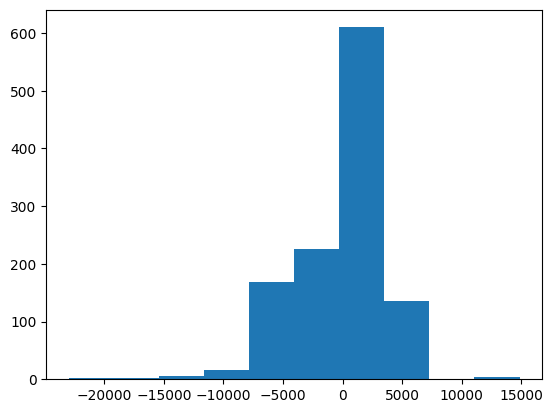

In [32]:
# Compute the error as actual minus predicted salary
error = np.array(salaries) - np.array(preds)

# Plot the errors as a histogram
plt.hist(error)
plt.show()

In [33]:
# Conduct an Anderson-Darling test using the years of experience
result = stats.anderson(error)

# Find where the result is significant 
print(result.statistic,result.critical_values, result.significance_level[result.statistic > result.critical_values]) # the test statistic is larger than the critical values at all significance levels, so the data doesn't come from a normal distribution

36.69987894403903 [0.574 0.654 0.784 0.915 1.088] [15.  10.   5.   2.5  1. ]


In [34]:
# Fitting a normal distribution

# When working with relatively small data sets you often don't have enough data to make principled inference. However, if you suspect the data follows a normal distribution, it may be reasonable to fit a normal distribution and work with this, rather than with the raw data. In this exercise you will work the same data on Hispanic firefighters which you previously showed was normally distributed at the 5% level. You will fit a normal distribution to it, and use this to find the percentage of these employees we would generally expect to have less than 10 years of experience.

In [35]:
# Fit a normal distribution to the data
mu, std = stats.norm.fit(salary_df['Years of Employment'])

calc_mu = np.mean(salary_df['Years of Employment'])
calc_std = np.std(salary_df['Years of Employment'])

mu, calc_mu, std, calc_std

(15.771428571428572, 15.771428571428572, 4.940131370640226, 4.940131370640226)

In [36]:
# Compute the percentage of employees with less than 10 years experience
percent = stats.norm.cdf(10, loc=mu, scale=std) # we are assuming that salary_df['Years of Employment'] is normally distributed, and using its mu and std to derive the norm.cdf

# Print out this percentage
print(percent)

0.12134806709798202


In [37]:
# Testing for correlation

# You want to understand if rent prices in Las Vegas and Houston are correlated or not. If you see prices rising in Las Vegas, is it reasonable to assume they are also rising in Houston? A NumPy array of rents has been loaded for Las Vegas (lasvegas_rents) and Houston (houston_rents), as well as the dates associated with each measurement.

In [38]:
lasvegas_rents= np.array([0.75, 0.75, 0.748, 0.748, 0.746, 0.744, 0.742, 0.74, 0.736, 0.734,
       0.734, 0.732, 0.73, 0.728, 0.728, 0.724, 0.724, 0.722, 0.722,
       0.722, 0.722, 0.72, 0.72, 0.718, 0.72, 0.72, 0.72, 0.72, 0.718,
       0.718, 0.718, 0.718, 0.718, 0.718, 0.718, 0.72, 0.722, 0.724,
       0.724, 0.724, 0.724, 0.726, 0.726, 0.726, 0.726, 0.728, 0.73,
       0.732, 0.734, 0.736, 0.736, 0.738, 0.74, 0.742, 0.744, 0.748,
       0.752, 0.754, 0.756, 0.756, 0.754, 0.754, 0.756, 0.76, 0.764,
       0.768, 0.77, 0.772, 0.774, 0.772, 0.774, 0.774, 0.778, 0.78, 0.78],
      dtype=object)

In [39]:
houston_rents= np.array([0.788, 0.784, 0.784, 0.786, 0.792, 0.796, 0.796, 0.794, 0.788,
       0.784, 0.778, 0.772, 0.772, 0.776, 0.776, 0.78, 0.782, 0.786,
       0.786, 0.788, 0.788, 0.794, 0.798, 0.798, 0.798, 0.796, 0.8, 0.806,
       0.812, 0.818, 0.824, 0.83, 0.836, 0.84, 0.848, 0.856, 0.866, 0.872,
       0.874, 0.872, 0.868, 0.868, 0.874, 0.882, 0.892, 0.902, 0.914,
       0.924, 0.934, 0.944, 0.95, 0.956, 0.958, 0.962, 0.964, 0.968,
       0.972, 0.974, 0.974, 0.974, 0.972, 0.974, 0.976, 0.98, 0.982,
       0.984, 0.984, 0.982, 0.98, 0.976, 0.974, 0.974, 0.976, 0.976,
       0.974], dtype=object)

In [40]:
dates=pd.DatetimeIndex(['2010-11-01', '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
               '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01'],
              dtype='datetime64[ns]', freq=None)

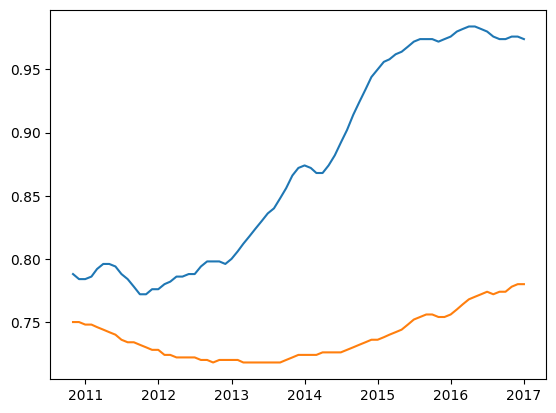

In [41]:
# Create a line graph showing the rents for both San Francisco and Las Vegas
plt.plot(dates, houston_rents, label='Houston')
plt.plot(dates, lasvegas_rents, label='Las Vegas')
plt.show()

In [42]:
# Compute the Pearson correlation coefficient R, as well as the p-value
r, p_value = stats.pearsonr(houston_rents, lasvegas_rents)

# Print if the p-value is less than alpha = 5%
print(p_value, p_value <= 0.05)

# Print out R-squared
print(r**2)

4.889339466408369e-12 True
0.4821621973882167


In [43]:
# Autocorrelation

# Do rent prices tend to show a similar pattern when compared year-over-year? If you take the rent prices in Los Angeles and compare them to rent prices one year in the past, will you see a significant relationship? In other words, do rent prices in Los Angeles demonstrate autocorrelation?

# A NumPy array of rents has been loaded for Los Angeles (la_rents), as well as the dates associated with each measurement, have been loaded for you

In [44]:
la_rents= np.array([1.578, 1.578, 1.58, 1.582, 1.586, 1.588, 1.59, 1.594, 1.594, 1.594,
       1.592, 1.59, 1.592, 1.592, 1.59, 1.588, 1.588, 1.588, 1.59, 1.588,
       1.59, 1.588, 1.592, 1.594, 1.598, 1.602, 1.608, 1.616, 1.622,
       1.628, 1.634, 1.64, 1.648, 1.656, 1.662, 1.672, 1.676, 1.682, 1.68,
       1.68, 1.678, 1.682, 1.688, 1.696, 1.708, 1.72, 1.738, 1.76, 1.78,
       1.8, 1.816, 1.834, 1.85, 1.862, 1.87, 1.878, 1.888, 1.9, 1.908,
       1.914, 1.92, 1.93, 1.948, 1.962, 1.978, 1.99, 2.004, 2.018, 2.026,
       2.032, 2.038, 2.042, 2.048, 2.056, 2.064], dtype=object)

In [45]:
dates= pd.DatetimeIndex(['2010-11-01', '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
               '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01'],
              dtype='datetime64[ns]', freq=None)

In [46]:
# Select all but the first twelve rents
la_rents_initial = la_rents[12:]

# Select all but the last twelve rents (12 month lag)
la_rents_lag = la_rents[:-12]

# Compute the correlation between the initial values and the lagged values
r, p_value = stats.pearsonr(la_rents_initial, la_rents_lag)

# Check if the p-value is significant at the 5% level
print(r, p_value, p_value<=0.05)

0.9645881054059641 5.205590226189644e-37 True


In [47]:
# Explained variance

# You saw that rent prices between Houston and Las Vegas are correlated. However, to what extent can the price change in one city explain the price change in another city? By computing R-squared you are able to precisely quantify this.

In [48]:
# Compute the correlation between Houston and Las Vegas
r, p_value = stats.pearsonr(houston_rents, lasvegas_rents)

# Print R-squared
print(r**2)

0.4821621973882167


In [49]:
# Equal variance

# Different industries have different levels of investment from venture capitalists (VCs). However, if you look at a sample of VC investments and see slightly different average investment amounts, is it reasonable to assume this difference is statistically significant? This is a perfect situation for ANOVA. However, a key condition for ANOVA is equal variance between all groups of samples. In this exercise you'll test for that using the Levene test of equal variance.

# A pandas DataFrame of investments of three industries (Biotechnology, Enterprise Software and Health Care) has been loaded for you in investments_df

In [50]:
investments_df = pd.read_csv('investments_VC.csv')
investments_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity
0,Games,4000000,operating,USA,2,0,4000000,0,0
1,Software,7000000,NaN,USA,1,0,7000000,0,0
2,Advertising,4912393,closed,ARG,1,0,0,0,0
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0
4,Games,41250,operating,HKG,1,41250,0,0,0
...,...,...,...,...,...,...,...,...,...
23675,Biotechnology,2686600,operating,AUT,1,0,2686600,0,0
23676,Education,320000,operating,GBR,1,320000,0,0,0
23677,Enterprise Software,1587301,operating,CHN,1,0,1587301,0,0
23678,Games,9300000,operating,NaN,1,9300000,0,0,0


In [52]:
# Select each industry separately
biotech_df = investments_df[investments_df['market'] == 'Biotechnology']
enterprise_df = investments_df[investments_df['market'] == 'Enterprise Software']
health_df = investments_df[investments_df['market'] == 'Health Care']
ecommerce_df = investments_df[investments_df['market'] == 'E-Commerce']


ecommerce_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity
5,E-Commerce,40000,operating,CHL,1,40000,0,0,0
8,E-Commerce,2050000,operating,USA,4,0,0,0,0
35,E-Commerce,50000,closed,USA,1,50000,0,0,0
37,E-Commerce,4163132,operating,CHN,2,0,4163132,0,0
41,E-Commerce,117000000,operating,USA,4,0,57000000,0,0
...,...,...,...,...,...,...,...,...,...
23657,E-Commerce,1503926,operating,GBR,1,0,1503926,0,0
23658,E-Commerce,2700000,closed,USA,1,0,0,0,0
23660,E-Commerce,1515151,operating,CHN,1,0,1515151,0,0
23666,E-Commerce,75000,operating,USA,1,0,75000,0,0


In [53]:
# Conduct Levene tests for equal variance between funding_total_usd for all pairs of industries
statistic_1, p_value_1 = stats.levene(biotech_df['funding_total_usd'], enterprise_df['funding_total_usd'])
statistic_2, p_value_2 = stats.levene(biotech_df['funding_total_usd'], health_df['funding_total_usd'])
statistic_3, p_value_3 = stats.levene(enterprise_df['funding_total_usd'], health_df['funding_total_usd'])

# Print if the p-value is significant at the 5% level
print(p_value_1, p_value_1 < 0.05)
print(p_value_2, p_value_2 < 0.05)
print(p_value_3, p_value_3 < 0.05)

# One pair (enterprise and biotech) had a larger p-value around 0.1. This indicates that there may be a little larger difference in variation than we would generally like. However, for our purposes this difference is small enough that we can proced with our ANOVA test.

0.10608810895774416 False
0.003769504493494368 True
0.0014358847125619865 True


In [ ]:
# Normality of groups

# Now that you've established equal variance, the next condition to check for is normality of the funding in each industry.

# In this exercise, you'll visualize and compare data with and without normality. 

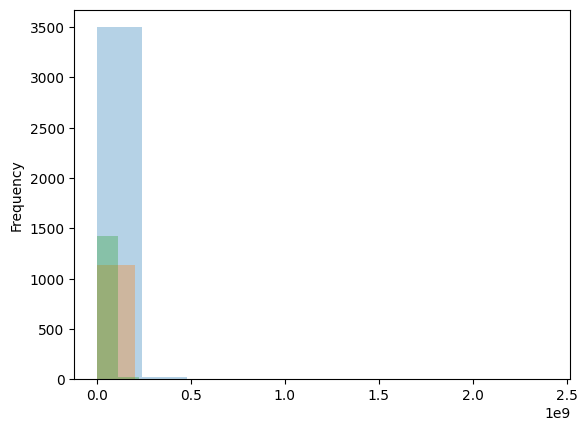

In [54]:
# Plot a histogram of the funding for each industry
biotech_df['funding_total_usd'].plot(kind='hist', alpha=0.33)
enterprise_df['funding_total_usd'].plot(kind='hist', alpha=0.33)
ecommerce_df['funding_total_usd'].plot(kind='hist', alpha=0.33)
plt.show()

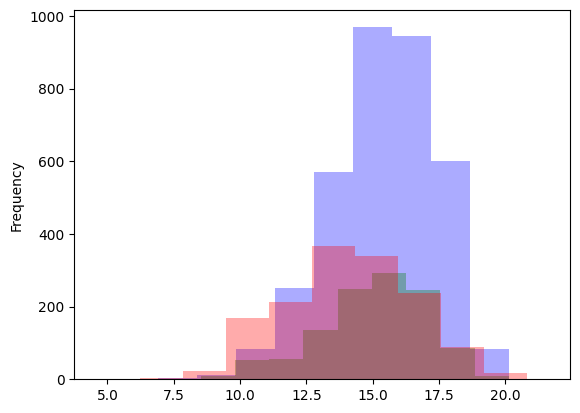

In [56]:
# Plot a histogram of the log funding for each industry
np.log(biotech_df['funding_total_usd']).plot(kind='hist', color='blue', alpha=0.33)
np.log(enterprise_df['funding_total_usd']).plot(kind='hist', color='green', alpha=0.33)
np.log(ecommerce_df['funding_total_usd']).plot(kind='hist', color='red', alpha=0.33)
plt.show()

# Notice how the raw data was not remotely normal, and was heavily right-skewed. As discussed in the video, one common fix is to apply a log-transformation. The log-transformation changed things drastically! Now all three appear at least approximately normal. If very high levels of precision were required, you could do an Anderson test for normality like you did in an earlier lesson

In [ ]:
# ANOVA

# Now that you've established equal variance using a Levene test and assessed visually the approximate normality of the log-transformed salaries, it's time to conduct an ANOVA test! Recall that the purpose of the ANOVA test is to determine if biotech, enterprise software and health care companies had equal average funding. Since these three groups satisfy the conditions of an ANOVA test, you know the conclusions from that test will be valid.

In [57]:
biotech_log_funding = np.log(biotech_df['funding_total_usd'])
enterprise_log_funding = np.log(enterprise_df['funding_total_usd'])
health_log_funding = np.log(health_df['funding_total_usd'])

# Conduct a one-way ANOVA test to compare the log-funding
s, p_value = stats.f_oneway(biotech_log_funding, enterprise_log_funding, health_log_funding)

# Print if the p-value is significant at 5%
print(p_value <= 0.05)

# The output True indicates that the p-value is less than or equal to 0.05, suggesting that there is a statistically significant difference in the average log-transformed funding between at least two of the categories (biotech, enterprise, health). 

True


In [ ]:
# Comparing rankings

# A number of organizations rank universities on factors such as research, teaching, and student satisfaction, among other factors. Three such organizations include the Times Higher Education World (THEW) University Ranking, the Academic Ranking (ARW) of World Universities, and the Center for World (CW) University Rankings. However, it's common for these organizations to give different ranks for the same university. How can you quantitatively measure the agreement or disagreement between rankings? One approach is to use a non-parametric rank correlation coefficient such as Kendall's tau.

In [58]:
rankings_df = pd.read_csv('university_rankings.csv')
rankings_df

,University,thew_rank,arw_rank,cw_rank,thew_score,arw_score,cw_score
0,Harvard University,1,1,1,96.1,100.0,100.00
1,Stanford University,4,3,3,94.3,73.4,89.50
2,University of Cambridge,6,2,4,91.2,73.6,86.17
3,California Institute of Technology,2,6,5,96.0,67.1,85.21
4,Princeton University,5,8,6,94.2,60.9,82.50
5,"University of California, Berkeley",8,4,10,91.1,72.8,78.55
6,University of Oxford,6,10,7,91.2,59.7,82.34
7,Yale University,10,11,8,89.5,56.9,79.14
8,University of Chicago,12,9,11,86.9,60.1,73.82
9,Columbia University,18,7,9,81.0,62.3,78.86


In [59]:
# Compute Kendall's tau between the THEW and ARW rankings
tau_thew_arw, p_value_thew_arw = stats.kendalltau(rankings_df['thew_rank'],rankings_df['arw_rank'])

tau_thew_arw, p_value_thew_arw

(0.6512525427983284, 3.4570509197908455e-09)

In [60]:
# Compute Kendall's tau between the THEW and CW rankings
tau_thew_cw, p_value_thew_cw = stats.kendalltau(rankings_df['thew_rank'],rankings_df['cw_rank'])

tau_thew_cw, p_value_thew_cw

(0.6623882222760947, 1.8240211163900803e-09)

In [61]:
# Compute Kendall's tau between the ARW and CW rankings
tau_arw_cw, p_value_arw_cw = stats.kendalltau(rankings_df['arw_rank'],rankings_df['cw_rank'])

tau_arw_cw, p_value_arw_cw

(0.7196922583826684, 6.29019199828259e-11)

In [ ]:
# Notice how ARW and CW have the largest value of tau, indicating the highest level of agreement. This is also reflected in them having a lower p-value. However, this is a two-tailed test, so if these two had a very high level of _disagreement_, the p-value would also be very low. Thus examining tau itself is important! Also, note that while you may have been tempted to use Pearson's R to measure correlation, since the data was ranked, inference based on Pearson's R likely would have been invalid! In this case, Kendall's tau is the right tool for the job!

In [ ]:
# Comparing medians

# Parametric tests tend to compare means, while non-parametric tests tend to compare medians. This is because if your data is skewed, the mean may not be a good measure of central tendency, and you should work with the median instead.

# Each of the university ranking organizations, you just looked at, also included a "total score" for each university. You'll start by determining if the scores are approximately normal by using a histogram. If they are not, you will perform a Mood's median test to compare their medians. In this exercise you'll work with the CW and ARW university rankings.

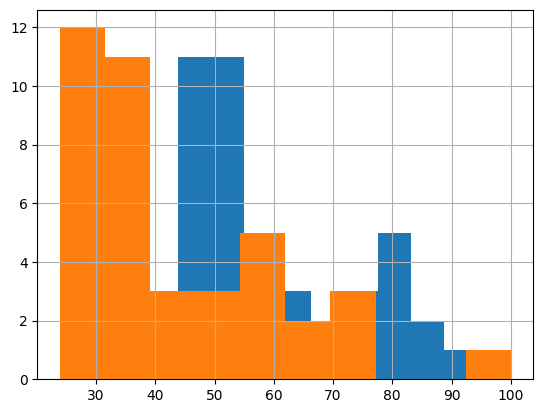

In [63]:
# Plot a histogram of the CW total score
rankings_df['cw_score'].hist()

# Plot a histogram of the ARW total score
rankings_df['arw_score'].hist()

plt.show()


In [64]:
# Conduct a Mood's median test comparing cw_score and arw_score
s, p_value, med, table = stats.median_test(rankings_df['cw_score'], rankings_df['arw_score'])

s, p_value, med, table

(11.25,
 0.0007962301575908106,
 50.620000000000005,
 array([[28, 12],
        [12, 28]], dtype=int64))

In [65]:
# Check if the p-value is significant at 5%
print(p_value <= 0.05)

True


In [ ]:
# Effect size for means

# Many venture capital-backed companies receive more than one round of funding. In general, the second round is bigger than the first. Just how much of an effect does the round number have on the average funding amount? You can use Cohen's d to quantify this.

# Recall that, to calculate Cohen's d, you need to first calculate the pooled standard deviation.

In [66]:
# Select all investments from rounds 1 and 2 separately
round1_df = investments_df[investments_df['funding_rounds'] == 1]
round2_df = investments_df[investments_df['funding_rounds'] == 2]
# Calculate the standard deviation of each round and the number of companies in each round
round1_sd = round1_df['funding_total_usd'].std()
round2_sd = round2_df['funding_total_usd'].std()
round1_n = round1_df.shape[0]
round2_n = round2_df.shape[0]

# Calculate the pooled standard deviation between the two rounds
pooled_sd = np.sqrt(((round1_n - 1) * round1_sd ** 2 + (round2_n - 1) *round2_sd ** 2) / (round1_n + round2_n - 2))

# Calculate Cohen's d
d = (round2_df['funding_total_usd'].mean() - round1_df['funding_total_usd'].mean()) / pooled_sd
d

# If you printed out d in the console you'll see it's only about 0.08. That's a surprisingly low value! That tells us that moving to a second round of funding does not in itself have a large effect on the amount of money raised. This is likely due to how large the standard deviations are, which means that the means are unreliable estimates.

0.07719192881235956

In [ ]:
# Effect size for correlations

# The volatility of an asset is roughly defined by how much its price changes. In this exercise you'll measure volatility on a per-day basis, defined as the (high price - low price) / closing price.

# What factors explain the volatility of Bitcoin? Is the volatility of the S&P500 closely related to this? Does volatility increase or decrease as prices rise? In other words, what is the effect size of the correlation between these different factors? You'll compute both of these effect size in this exercise.

In [67]:
# Compute the volatility of Bitcoin
btc_sp_df['Volatility_BTC'] = (btc_sp_df['High_BTC'] - btc_sp_df['Low_BTC']) / btc_sp_df['Close_BTC']

# Compute the volatility of the S&P500
btc_sp_df['Volatility_SP500'] = (btc_sp_df['High_SP500'] - btc_sp_df['Low_SP500']) / btc_sp_df['Close_SP500']

btc_sp_df

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500,Volatility_BTC,Volatility_SP500
0,2017-08-07,3212.780029,3397.679932,3180.889893,3378.939941,2480.91,2477.14,2480.95,2475.88,0.064159,0.002044
1,2017-08-08,3370.219971,3484.850098,3345.830078,3419.939941,2474.92,2478.35,2490.87,2470.32,0.040650,0.008303
2,2017-08-09,3420.399902,3422.760010,3247.669922,3342.469971,2474.02,2465.35,2474.41,2462.08,0.052383,0.004984
3,2017-08-10,3341.840088,3453.449951,3319.469971,3381.280029,2438.21,2465.38,2465.38,2437.75,0.039624,0.011332
4,2017-08-11,3373.820068,3679.719971,3372.120117,3650.620117,2441.32,2441.04,2448.09,2437.85,0.084260,0.004194
...,...,...,...,...,...,...,...,...,...,...,...
1253,2022-07-29,23845.212891,24294.787109,23481.173828,23804.632813,4130.29,4087.33,4140.15,4079.22,0.034179,0.014752
1254,2022-08-01,23336.718750,23464.787109,22890.796875,23314.199219,4118.63,4112.38,4144.95,4096.02,0.024620,0.011880
1255,2022-08-02,23308.433594,23415.041016,22710.083984,22978.117188,4091.19,4104.21,4140.47,4079.81,0.030679,0.014827
1256,2022-08-03,22981.302734,23578.650391,22747.835938,22846.507813,4155.17,4107.96,4167.66,4107.96,0.036365,0.014368


In [68]:
# Compute and print R^2 between the volatility of BTC and SP500
r_volatility, p_value_volatility = stats.pearsonr(btc_sp_df['Volatility_BTC'], btc_sp_df['Volatility_SP500'])
print('R^2 between volatility of the assets:', r_volatility**2)

R^2 between volatility of the assets: 0.03152987723111431


In [69]:
# Compute and print R^2 between the volatility of BTC and the closing price of BTC
r_closing, p_value_closing = stats.pearsonr(btc_sp_df['Volatility_BTC'], btc_sp_df['Close_BTC'])
print('R^2 between closing price and volatility of BTC:', r_closing**2)

R^2 between closing price and volatility of BTC: 0.012520659135177206


In [ ]:
# Neither the volatility of the S&P 500 nor the closing price of BTC has a large correlation with the volatility of BTC. However, you still learn something from the correlations! You can see that the volatility of the S&P 500 explains about 3% of the variation of volatility of BTC, while the closing price of BTC explains about 1%. Therefore, price swings in BTC aren't simply related to price swings in the S&P 500, nor in the price of BTC being especially high/low.

In [ ]:
# Effect size for categorical variables

# You saw in the City of Austin employee data that job titles have an unequal distribution of genders. But does the same thing hold for ethnicities? And to what extent does ethnicity relate to the job title chosen? In this exercise you'll dig in and answer that question.

In [70]:
data = {
    'Asian': [5, 8, 5, 37, 5, 34],
    'Black or African American': [34, 9, 37, 142, 31, 86],
    'Hispanic or Latino': [99, 36, 127, 227, 77, 263],
    'White': [78, 149, 361, 493, 263, 788]
}

index = ['Administrative Specialist', 'Fire Specialist', 'Firefighter', 'MuniProg, Paraprofessional', 'Police Corporal/Detective', 'Police Officer']

employees_df = pd.DataFrame(data, index=index)
employees_df

,Asian,Black or African American,Hispanic or Latino,White
Administrative Specialist,5,34,99,78
Fire Specialist,8,9,36,149
Firefighter,5,37,127,361
"MuniProg, Paraprofessional",37,142,227,493
Police Corporal/Detective,5,31,77,263
Police Officer,34,86,263,788


In [71]:
# Compute the chi-squared statistic
chi2, p, d, expected = stats.chi2_contingency(employees_df)

chi2, p, d, expected

# d = Chi-Square degrees of freedom = #rows-1 * #columns-1 = 3 * 5 = 15 (different from dof of Cramer's V below)

(169.50021516476974,
 3.079509555761004e-28,
 15,
 array([[  5.98232174,  21.57454331,  52.75898645, 135.6841485 ],
        [  5.59457867,  20.17619328,  49.33942251, 126.88980554],
        [ 14.67884502,  52.93753683, 129.45492045, 332.9286977 ],
        [ 24.89864467,  89.79404832, 219.58485563, 564.72245138],
        [ 10.41367118,  37.55568651,  91.83971715, 236.19092516],
        [ 32.43193872, 116.96199175, 286.02209782, 735.58397171]]))

In [72]:
# Compute the DOF using the number of rows and columns (for Cramer's)
dof = min(employees_df.shape[0] - 1, employees_df.shape[1] - 1)

dof

3

In [73]:
# Compute the total number of people
n = np.sum(employees_df.values)

n

3394

In [74]:
# Compute Cramer's V
v = np.sqrt((chi2 / n) / dof)

print("Cramer's V:", v, "\nDegrees of freedom:", dof)

Cramer's V: 0.12902342923732754 
Degrees of freedom: 3


In [ ]:
# Multiple comparisons problem

# The multiple comparisons problem arises when a researcher repeatedly checks different variables/samples against one another for significance. Just by random chance we expect to find an occasional result of statistical significance.

# In this exercise you'll work with data from salaries for employees at the City of Austin, TX. You will compare their salaries against randomly generated data. You will see how often this random data is "significant" in explaining the salaries of employees. Clearly any such "significance" would be spurious, as random numbers aren't very helpful in explaining anything!

In [75]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(0)

# Create a DataFrame with 1171 rows
num_rows = 1171

# Generate 'Years of Employment' data
years_of_employment = np.random.randint(1, 30, num_rows)

# Generate 'Annual Salary' data proportional to 'Years of Employment'
annual_salary = years_of_employment * 5000 + np.random.normal(0, 5000, num_rows)

# Create other columns
title = ['Police Officer'] * num_rows
gender = np.random.choice(['M', 'F'], num_rows)
ethnicity = np.random.choice(['White', 'Hispanic or Latino', 'Asian', 'Black or African American'], num_rows)

# Create the DataFrame
police_salaries_df = pd.DataFrame({
    'Title': title,
    'Gender': gender,
    'Ethnicity': ethnicity,
    'Annual Salary': annual_salary,
    'Years of Employment': years_of_employment
})

# Display the DataFrame
police_salaries_df


,Title,Gender,Ethnicity,Annual Salary,Years of Employment
0,Police Officer,M,Hispanic or Latino,64771.480197,13
1,Police Officer,F,Hispanic or Latino,81102.538279,16
2,Police Officer,F,Hispanic or Latino,104850.323583,22
3,Police Officer,F,Asian,3250.283177,1
4,Police Officer,M,Asian,25501.421691,4
...,...,...,...,...,...
1166,Police Officer,F,White,130824.036549,27
1167,Police Officer,M,Hispanic or Latino,80266.297945,17
1168,Police Officer,M,White,45741.752903,8
1169,Police Officer,F,Asian,75445.748112,16


r_mean 0.08379994050161362 p_mean 0.042736107247145744 n_significant 823


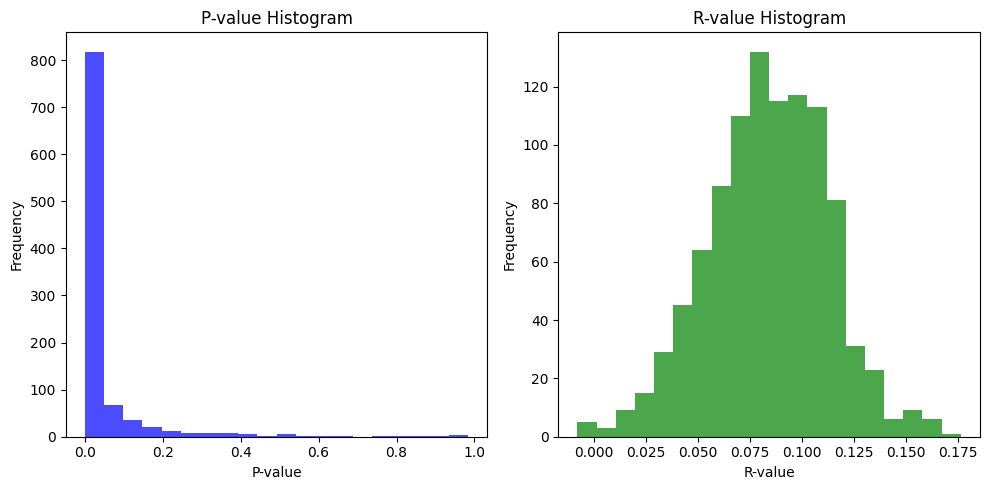

In [83]:
# CALCULATE R AND PVALUE BETWEEN SALARY AND A CORRELATED VARIABLE

# Compute number of rows and initialize n_significant
n_rows = police_salaries_df.shape[0]
n_significant = 0
r_sum = 0
p_sum = 0
p_list = []
r_list = []

# For loop which generates n_rows random numbers 1000 times
for i in range(1000):
    correlated_nums = police_salaries_df['Annual Salary'] * 0.01 + np.random.normal(-5000, 5000, num_rows)
    # Compute correlation between correlated_nums and police salaries
    r, p_value = stats.pearsonr(police_salaries_df['Annual Salary'], correlated_nums)
    # If the p-value is significant at 5%, increment n_significant
    if p_value < 0.05:
        n_significant += 1
    r_sum += r
    p_sum += p_value
    p_list.append(p_value)
    r_list.append(r)

r_mean = r_sum /1000
p_mean = p_sum /1000
    
print('r_mean',r_mean, 'p_mean',p_mean, 'n_significant',n_significant)


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram of p_list on the first axis
axs[0].hist(p_list, bins=20, color='blue', alpha=0.7)
axs[0].set_title('P-value Histogram')
axs[0].set_xlabel('P-value')
axs[0].set_ylabel('Frequency')

# Plot the histogram of r_list on the second axis
axs[1].hist(r_list, bins=20, color='green', alpha=0.7)
axs[1].set_title('R-value Histogram')
axs[1].set_xlabel('R-value')
axs[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

r_mean -0.0012688436337903865 p_mean 0.5025184529954128 p_other_mean 0.5025184529954124 n_significant 45


(array([  3.,  21.,  80., 172., 234., 255., 150.,  66.,  11.,   8.]),
 array([-0.09692265, -0.07746693, -0.05801122, -0.0385555 , -0.01909978,
         0.00035593,  0.01981165,  0.03926737,  0.05872308,  0.0781788 ,
         0.09763452]),
 <BarContainer object of 10 artists>)

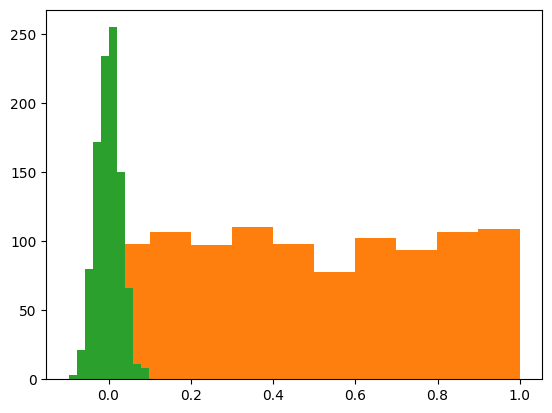

In [85]:
# CALCULATE R AND PVALUE BETWEEN SALARY AND A RANDOM VARIABLE

# Compute number of rows and initialize n_significant
n_rows = police_salaries_df.shape[0]
n_significant = 0
iterations = 1000

r_sum = 0
p_sum = 0
p_other_sum = 0

r_list = []
p_list = []
p_other_list = []

# For loop which generates n_rows random numbers 1000 times
for i in range(iterations):
    random_nums = np.random.uniform(size=n_rows)
    # Compute correlation between random_nums and police salaries
    r, p_value = stats.pearsonr(police_salaries_df['Annual Salary'], random_nums)
    
     # Below an alternative method to calculate the pvalue, using the t-distribution. This method does not assume that your data follows a bivariate normal distribution, and it can be used for any sample size. However, it still assumes that your data is independent and identically distributed (i.i.d.), which is a common assumption in many statistical tests. If this assumption is not met, the p-values may not be accurate. Please note that this method is also performing a two-tailed test, hence the multiplication by 2. If you want to perform a one-tailed test, you can remove the multiplication by 2
    
    # Calculate the t-score
    t_score = r * np.sqrt((n_rows - 2) / (1 - r**2))
    # Calculate the p-value using the CDF of the t-distribution
    p_value_other = 2 * (1 - t.cdf(np.abs(t_score), df=n_rows-2))
    
    # If the p-value is significant at 5%, increment n_significant
    if p_value < 0.05:
        n_significant += 1
        
    r_sum += r
    p_sum += p_value
    p_other_sum += p_value_other
    
    r_list.append(r)
    p_list.append(p_value)
    p_other_list.append(p_value_other)

r_mean = r_sum / iterations
p_mean = p_sum / iterations
p_other_mean = p_other_sum / iterations
    
print('r_mean',r_mean, 'p_mean',p_mean, 'p_other_mean',p_other_mean, 'n_significant',n_significant)
plt.hist(p_list)
plt.hist(p_other_list)
plt.hist(r_list)

# When you correlate a variable with a set of random numbers (which inherently have no correlation), you’re effectively simulating the null hypothesis of no correlation. The p-value signifies the probability of observing a correlation coefficient (‘r’) as extreme or more extreme than the one you obtained, under the assumption of no correlation. Given that you’re comparing with a random variable, you’re essentially operating under the null hypothesis. Therefore, the correlation ‘r’ you calculate in your test is likely to be close to zero, as there is no true correlation between the variables.

# The p-values are uniformly distributed between 0 and 1, because under the null hypothesis all outcomes are equally likely. This means that if the null hypothesis is true, 'significant' correlations (which result in p-values close to 0) are just as likely as 'non-significant' correlations (which result in p-values close to 1). In fact, in the simulation, you found that about 50 'n_significant' out of 1000, or 5%, of the results were significant. Being the alpha cutoff for significance 5%, meaning about 5% of the time a random correlation will cross this threshold. This is exactly what you would expect by chance alone when the null hypothesis is true.

r_mean -0.001472152209537172 p_mean 0.5000434226466495 p_other_mean 0.5000434226466492 n_significant 0


(array([  5.,  13.,  63., 150., 264., 251., 173.,  63.,  17.,   1.]),
 array([-0.10145205, -0.08144125, -0.06143046, -0.04141966, -0.02140886,
        -0.00139806,  0.01861274,  0.03862354,  0.05863433,  0.07864513,
         0.09865593]),
 <BarContainer object of 10 artists>)

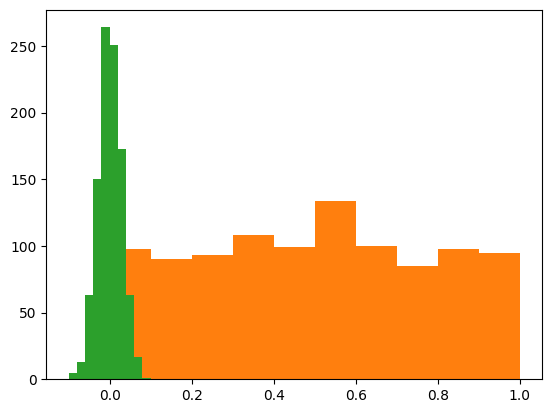

In [87]:
# The Bonferroni correction helps adjust for multiple comparisons to avoid those almost 5% 'n_significant'. When you make many comparisons (like testing 1000 correlations), the probability of finding at least one statistically significant result by chance increases. By reducing the alpha (significance level) proportionally to the number of comparisons (e.g., dividing alpha by 1000), you tighten the criteria for significance, making sure your results are robust and not just flukes.


# CALCULATE R AND PVALUE BETWEEN SALARY AND A RANDOM VARIABLE with Bonferroni Correction

# Compute number of rows and initialize n_significant
n_rows = police_salaries_df.shape[0]
n_significant = 0
iterations = 1000

r_sum = 0
p_sum = 0
p_other_sum = 0

r_list = []
p_list = []
p_other_list = []

alpha_bonferroni = 0.05 / iterations # check in the results that the n_significant will be close to 0

# For loop which generates n_rows random numbers 1000 times
for i in range(iterations):
    random_nums = np.random.uniform(size=n_rows)
    # Compute correlation between random_nums and police salaries
    r, p_value = stats.pearsonr(police_salaries_df['Annual Salary'], random_nums)
    
    # Calculate the t-score
    t_score = r * np.sqrt((n_rows - 2) / (1 - r**2))
    # Calculate the p-value using the CDF of the t-distribution
    p_value_other = 2 * (1 - t.cdf(np.abs(t_score), df=n_rows-2))
    
    # If the p-value is significant at 5%, increment n_significant
    if p_value < alpha_bonferroni:
        n_significant += 1
        
    r_sum += r
    p_sum += p_value
    p_other_sum += p_value_other
    
    r_list.append(r)
    p_list.append(p_value)
    p_other_list.append(p_value_other)

r_mean = r_sum / iterations
p_mean = p_sum / iterations
p_other_mean = p_other_sum / iterations
    
print('r_mean',r_mean, 'p_mean',p_mean, 'p_other_mean',p_other_mean, 'n_significant',n_significant)
plt.hist(p_list)
plt.hist(p_other_list)
plt.hist(r_list)

In [88]:
investments_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity
0,Games,4000000,operating,USA,2,0,4000000,0,0
1,Software,7000000,NaN,USA,1,0,7000000,0,0
2,Advertising,4912393,closed,ARG,1,0,0,0,0
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0
4,Games,41250,operating,HKG,1,41250,0,0,0
...,...,...,...,...,...,...,...,...,...
23675,Biotechnology,2686600,operating,AUT,1,0,2686600,0,0
23676,Education,320000,operating,GBR,1,320000,0,0,0
23677,Enterprise Software,1587301,operating,CHN,1,0,1587301,0,0
23678,Games,9300000,operating,NaN,1,9300000,0,0,0


In [89]:
ads_acquired_avg_funding = investments_df[investments_df.market == 'Advertising'].funding_total_usd
ads_acquired_avg_funding

2         4912393
19         650267
24        5500000
81           6000
85       25654560
           ...   
23509    80000000
23584     2000000
23611    30000000
23632      650000
23659       12000
Name: funding_total_usd, Length: 917, dtype: int64

In [90]:
games_acquired_avg_funding = investments_df[investments_df.market == 'Games'].funding_total_usd
games_acquired_avg_funding

0        4000000
4          41250
27        200000
29         50000
44       1660000
          ...   
23609    2600000
23615    2475000
23631     900000
23635    4220018
23678    9300000
Name: funding_total_usd, Length: 957, dtype: int64

In [91]:
ads_n = ads_acquired_avg_funding.shape[0]
games_n = games_acquired_avg_funding.shape[0]

ads_n, games_n

(917, 957)

In [92]:
# Compute the ratio of games to advertising companies
games_ads_ratio = games_n / ads_n

# Compute the power of the t test
TTestIndPower().power(effect_size=0.15, 
                      nobs1=ads_n,
                      alpha=0.05,
                      ratio=games_ads_ratio) # The ratio parameter in your power calculation accounts for different sample sizes between the two groups.

0.9004920362565682

In [93]:
# Solve for the sample size needed to achieve a power of 80%
nobs1 = TTestIndPower().solve_power(effect_size=0.15, 
                                    nobs1=None,
                                    alpha=0.05,
                                    power=0.8)

# Print the number of participants needed in one group
print(nobs1)

698.6381616833859


In [ ]:
# Bootstrap confidence intervals

# You previously saw that there is some degree of correlation between the S&P 500 and Bitcoin. One way to measure this would be to look at the correlation coefficient Pearson's R between the two. However, doing so results in only a point estimate. Presumably, at some points in time the correlation between the two is quite close, while at other times they behave very differently. How can you characterize the variability? One approach is to create a bootstrap confidence interval for the correlation coefficient between the two. 

In [94]:
# Compute the daily percent change of each asset
btc_sp_df['Pct_Daily_Change_BTC'] = -(btc_sp_df['Open_BTC'] - btc_sp_df['Close_BTC']) / btc_sp_df['Open_BTC']
btc_sp_df['Pct_Daily_Change_SP500'] = -(btc_sp_df['Open_SP500'] - btc_sp_df['Close_SP500']) / btc_sp_df['Open_SP500']
btc_sp_df

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500,Volatility_BTC,Volatility_SP500,Pct_Daily_Change_BTC,Pct_Daily_Change_SP500
0,2017-08-07,3212.780029,3397.679932,3180.889893,3378.939941,2480.91,2477.14,2480.95,2475.88,0.064159,0.002044,0.051718,0.001522
1,2017-08-08,3370.219971,3484.850098,3345.830078,3419.939941,2474.92,2478.35,2490.87,2470.32,0.040650,0.008303,0.014753,-0.001384
2,2017-08-09,3420.399902,3422.760010,3247.669922,3342.469971,2474.02,2465.35,2474.41,2462.08,0.052383,0.004984,-0.022784,0.003517
3,2017-08-10,3341.840088,3453.449951,3319.469971,3381.280029,2438.21,2465.38,2465.38,2437.75,0.039624,0.011332,0.011802,-0.011021
4,2017-08-11,3373.820068,3679.719971,3372.120117,3650.620117,2441.32,2441.04,2448.09,2437.85,0.084260,0.004194,0.082044,0.000115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2022-07-29,23845.212891,24294.787109,23481.173828,23804.632813,4130.29,4087.33,4140.15,4079.22,0.034179,0.014752,-0.001702,0.010511
1254,2022-08-01,23336.718750,23464.787109,22890.796875,23314.199219,4118.63,4112.38,4144.95,4096.02,0.024620,0.011880,-0.000965,0.001520
1255,2022-08-02,23308.433594,23415.041016,22710.083984,22978.117188,4091.19,4104.21,4140.47,4079.81,0.030679,0.014827,-0.014172,-0.003172
1256,2022-08-03,22981.302734,23578.650391,22747.835938,22846.507813,4155.17,4107.96,4167.66,4107.96,0.036365,0.014368,-0.005865,0.011492


In [95]:
# Write a function which returns the correlation coefficient
def pearson_r(x, y):
    return stats.pearsonr(x,y)[0]
  
# Compute a bootstrap confidence interval
ci = stats.bootstrap((btc_sp_df['Pct_Daily_Change_BTC'], btc_sp_df['Pct_Daily_Change_SP500']), 
                     statistic=pearson_r, 
                     vectorized=False, paired=True, n_resamples=1000, random_state=1)

print(ci.confidence_interval)

ConfidenceInterval(low=0.17970541935949022, high=0.34392714265260166)


In [ ]:
# Bootstrapping vs. normality

# You've seen the results of a bootstrap confidence interval for Pearson's R. But what about common situations like making a confidence interval for a mean? Why would you use a bootstrap confidence interval over a "normal" confidence interval coming from stats.norm?

In [96]:
investments_df.market.unique()

array(['Games', 'Software', 'Advertising', 'Curated Web', 'E-Commerce',
       'Health and Wellness', 'Education', 'Analytics', 'Biotechnology',
       'Enterprise Software', 'Mobile', 'Manufacturing', 'Finance',
       'Social Media', 'Hardware + Software', 'Clean Technology',
       'Semiconductors', 'Web Hosting', 'Security', 'Health Care'],
      dtype=object)

In [97]:
# Select just the companies in the Analytics market
analytics_df = investments_df[investments_df['market'] == 'Analytics']

analytics_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity
12,Analytics,1250000,acquired,USA,2,750000,500000,0,0
244,Analytics,1412834,operating,FRA,1,1412834,0,0,0
246,Analytics,500000,acquired,USA,1,0,500000,0,0
289,Analytics,20000000,operating,USA,1,0,20000000,0,0
321,Analytics,8500000,operating,USA,2,0,8500000,0,0
...,...,...,...,...,...,...,...,...,...
23479,Analytics,27138500,closed,USA,6,0,20638500,0,0
23506,Analytics,112000000,operating,USA,3,0,112000000,0,0
23527,Analytics,162954,operating,CHN,1,0,0,0,0
23592,Analytics,2388400,acquired,FIN,1,0,2388400,0,0


(array([539.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00000000e+00, 6.40684042e+07, 1.28136808e+08, 1.92205213e+08,
        2.56273617e+08, 3.20342021e+08, 3.84410425e+08, 4.48478829e+08,
        5.12547234e+08, 5.76615638e+08, 6.40684042e+08]),
 <BarContainer object of 10 artists>)

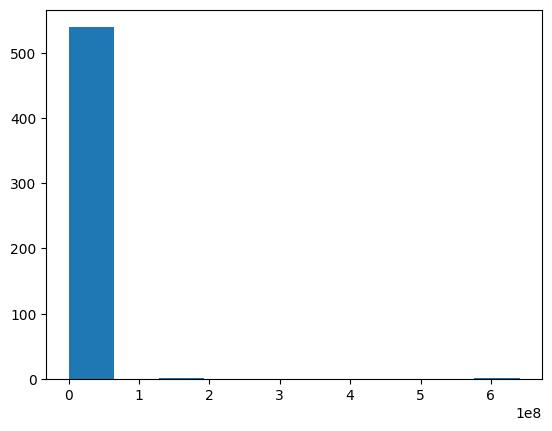

In [98]:
plt.hist(analytics_df['private_equity'])

In [101]:
# Confidence interval using the stats.norm function
norm_ci = stats.norm.interval(alpha=0.95,
                             loc=analytics_df['private_equity'].mean(),
                             scale=analytics_df['private_equity'].std() / np.sqrt(analytics_df.shape[0]))

analytics_df['private_equity'].mean()

C:\Users\Alienware\AppData\Local\Temp\ipykernel_31480\3389778935.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  norm_ci = stats.norm.interval(alpha=0.95,


1677463.1293900185

In [102]:
# Construct a bootstrapped confidence interval
bootstrap_ci = stats.bootstrap(data=(analytics_df['private_equity'], ),
                              statistic=np.mean)

print('Normal CI:', norm_ci)
print('Bootstrap CI:', bootstrap_ci.confidence_interval)

# These two return quite different results, even though they're estimating the same thing! The primary reason for the difference is that the mean is relatively small and spread out, so the standard error is large. That causes the normal confidence interval to contain negative values.

Normal CI: (-695062.1822300977, 4049988.4410101348)
Bootstrap CI: ConfidenceInterval(low=338509.49111764826, high=7275289.504931464)


In [ ]:
# Fisher's method in SciPy

# Suppose you read five different papers on the role of a healthy diet on cancer diagnoses, with reported p-values loaded in the list p_values = [0.04, 0.13, 0.001, 0.09, 0.01]. In each case the papers are all assessing the null hypothesis that healthy diet has no relationship on cancer diagnosis, while the alternative is that there is a relationship.

# Use these p-values in Fisher's method using SciPy.

In [103]:
p_values = [0.04, 0.13, 0.001, 0.09, 0.01]

# Compute the combined p-value and the p-value for this test
test_statistic, p_value = stats.combine_pvalues(p_values)

test_statistic, p_value

(38.35993545403371, 3.284794364823585e-05)

In [104]:
# Print out the p-value for the test
print('Test p-value = ', p_value)

# Print out if the p-value is signifcant at 5%
print(p_value < 0.05)

Test p-value =  3.284794364823585e-05
True


In [ ]:
# Permutation tests for correlations

# How does the volatility of Bitcoin compare to the volatility of the S&P 500?

# You previously computed volatility as the percent daily change, which has been stored for you in the Pct_Daily_Change_BTC and Pct_Daily_Change_SP500 columns in your data. The question you want to answer is the extent to which these two values correlate. One way to answer this is through a permutation test. By randomly shuffling values between the S&P 500 and BTC you are able to see what a random outcome would like like, and then compare this to the observed values.

In [105]:
btc_sp_df

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500,Volatility_BTC,Volatility_SP500,Pct_Daily_Change_BTC,Pct_Daily_Change_SP500
0,2017-08-07,3212.780029,3397.679932,3180.889893,3378.939941,2480.91,2477.14,2480.95,2475.88,0.064159,0.002044,0.051718,0.001522
1,2017-08-08,3370.219971,3484.850098,3345.830078,3419.939941,2474.92,2478.35,2490.87,2470.32,0.040650,0.008303,0.014753,-0.001384
2,2017-08-09,3420.399902,3422.760010,3247.669922,3342.469971,2474.02,2465.35,2474.41,2462.08,0.052383,0.004984,-0.022784,0.003517
3,2017-08-10,3341.840088,3453.449951,3319.469971,3381.280029,2438.21,2465.38,2465.38,2437.75,0.039624,0.011332,0.011802,-0.011021
4,2017-08-11,3373.820068,3679.719971,3372.120117,3650.620117,2441.32,2441.04,2448.09,2437.85,0.084260,0.004194,0.082044,0.000115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2022-07-29,23845.212891,24294.787109,23481.173828,23804.632813,4130.29,4087.33,4140.15,4079.22,0.034179,0.014752,-0.001702,0.010511
1254,2022-08-01,23336.718750,23464.787109,22890.796875,23314.199219,4118.63,4112.38,4144.95,4096.02,0.024620,0.011880,-0.000965,0.001520
1255,2022-08-02,23308.433594,23415.041016,22710.083984,22978.117188,4091.19,4104.21,4140.47,4079.81,0.030679,0.014827,-0.014172,-0.003172
1256,2022-08-03,22981.302734,23578.650391,22747.835938,22846.507813,4155.17,4107.96,4167.66,4107.96,0.036365,0.014368,-0.005865,0.011492


In [106]:
# Define a function which returns the Pearson R value
def statistic(x, y):
	return stats.pearsonr(x, y)[0]

# Define the data as the percent daily change from each asset
data = (btc_sp_df['Pct_Daily_Change_BTC'], btc_sp_df['Pct_Daily_Change_SP500'])

data

(0       0.051718
 1       0.014753
 2      -0.022784
 3       0.011802
 4       0.082044
           ...   
 1253   -0.001702
 1254   -0.000965
 1255   -0.014172
 1256   -0.005865
 1257   -0.009509
 Name: Pct_Daily_Change_BTC, Length: 1258, dtype: float64,
 0       0.001522
 1      -0.001384
 2       0.003517
 3      -0.011021
 4       0.000115
           ...   
 1253    0.010511
 1254    0.001520
 1255   -0.003172
 1256    0.011492
 1257   -0.000700
 Name: Pct_Daily_Change_SP500, Length: 1258, dtype: float64)

In [107]:
# Permutation tests don't make assumptions about the data distribution, making them robust and non-parametric. They involve shuffling the data many times and recalculating the test statistic for each shuffle to build a distribution under the null hypothesis.

# Compute a permutation test for the percent daily change of each asset
res = stats.permutation_test(data, statistic, 
           n_resamples=1000,
           vectorized=False, # the test statistic function is not vectorized
           alternative='greater')

# Print if the p-value is significant at 5%
print(res.pvalue < 0.05)
res.statistic, res.pvalue

True


(0.23801639989063003, 0.000999000999000999)

In [ ]:
# Analyzing skewed data with a permutation test

# Permutation tests can be useful for situations which don't satisfy the conditions of the hypothesis tests you already know. In this exercise you'll code up a permutation test using the statsmodels package.

# You're interested in comparing the average number of funding rounds between between companies in the analytics space and all other venture-funded companies. While you may be tempted to use a t-test, you can be sure that the number of funding rounds is not normally distributed. Instead, the majority of companies have only one round, with the number of companies with two or more rounds quickly dropping off.

In [108]:
non_analytics_df = investments_df[investments_df['market'] != 'Analytics']
non_analytics_df

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity
0,Games,4000000,operating,USA,2,0,4000000,0,0
1,Software,7000000,NaN,USA,1,0,7000000,0,0
2,Advertising,4912393,closed,ARG,1,0,0,0,0
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0
4,Games,41250,operating,HKG,1,41250,0,0,0
...,...,...,...,...,...,...,...,...,...
23675,Biotechnology,2686600,operating,AUT,1,0,2686600,0,0
23676,Education,320000,operating,GBR,1,320000,0,0,0
23677,Enterprise Software,1587301,operating,CHN,1,0,1587301,0,0
23678,Games,9300000,operating,NaN,1,9300000,0,0,0


<Axes: >

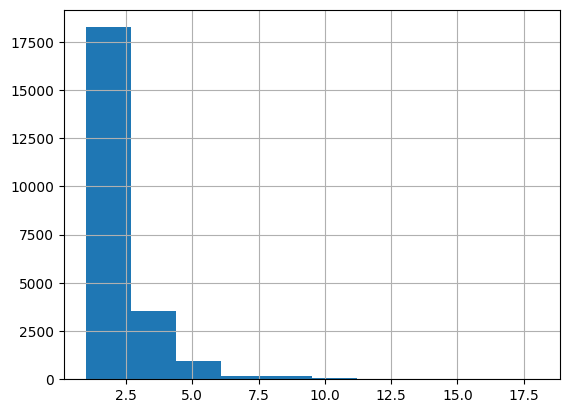

In [110]:
non_analytics_df.funding_rounds.hist()

In [111]:
# Write a "statistic" function which calculates the difference in means
def statistic(funding_group_1, funding_group_2):
    return np.mean(funding_group_1) - np.mean(funding_group_2)

# Conduct a permutation test using 100 resamples
perm_result = stats.permutation_test((analytics_df['funding_rounds'], non_analytics_df['funding_rounds']),
                                    statistic=statistic,
                                    n_resamples=100,
                                    vectorized=False)

# Print the p-value
print(perm_result.pvalue)
perm_result.statistic

0.019801980198019802


0.22875870562530598